#**CARDIOVASCULAR RISK PREDICTION**

![Heart disease prediction using ML](https://www.heart.org/-/media/Images/Around-the-AHA/2022-Top-10_SC.jpg)


##**PROBLEM DESCRIPTION**

Of all heart diseases, coronary heart disease (aka heart attack) is by far the most common and the most fatal. In the United States, for example, it is estimated that someone has a heart attack every 40 seconds and about 805,000 Americans have a heart attack every year (CDC 2019).

Doctors and scientists alike have turned to machine learning (ML) techniques to develop screening tools and this is because of their superiority in pattern recognition and classification as compared to other traditional statistical approaches.

 So, here classification goal is to predict whether the
patient has a 10-year risk of future coronary heart disease (CHD). The dataset
provides the patients’ information. It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. There are both demographic, behavioral,
and medical risk factors.
Here, we have to build a Predictive Model which will give early detections of heart disease.

##**Data description**


Fields Description

- sex: gender
- Age: age
- is_smoking: Whether smoking currently or not
- Cigs_Per_Day : Cigarettes smoked per day
- 8P_Meds : Whether taking BP meds or not
- Prevalent Stroke: If the patient has a history of stroke
- Prevalent hyp: If the patient has a history of hypertension
- Diabetes: Patient has diabetes or not
- Tot Chol: Cholesterol measure
- sys BP: BP measure
- Dia BP: BP measure
- BMI: Body Mass Index
- Heart Rate: Heart Rate measure
- Glucose: glucose level
- 10-year risk of coronary heart disease CHD(binary:“1”, means
   “Yes”, “0” means “No”)

#**Project Work flow**
---

1. Importing libraries and packages

2. Lets understand the data

3. Finding the insights, patterns and relations

4. Feature Engineering & Data Pre-processing

5. Algorithm being used

6. Plot of scores for models

7. Hyperparametric tunning

8. Selection of best model

9. SHAP(Shapley additive Explanations)

10. Conclusion
---

## **1.Importing libraries and packages**

In [ ]:
# For Data Manipulation
import numpy as np
import pandas as pd

# For ML model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# For Visualizatin
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas visual setting
pd.set_option('display.max_columns', None)

# To ignore irrelevent warnigns
import warnings
warnings.filterwarnings('ignore')


# Seaborn setting
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

##**2.Lets understand the data**

In [ ]:
# Set up the url
URL = 'https://drive.google.com/file/d/1cLHnV4i76jY4t5-dvZuXwntO5G3gYnJ0/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]

# Lets view the overall data
df = pd.read_csv(path,encoding= 'unicode_escape')
df.head(5)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# Check the shape of data set
df.shape

(3390, 17)

There are 3390 observations and 17 columns

In [ ]:
# Let's get the stats of data
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [ ]:
# Get the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

 Dataset has some null values in columns education, cigs per day , BP meds , totchol, BMI, heartRate, glucose. Our data consist of three types of data : float64(9), int64(6), object(2)

In [ ]:
# Lets find the number of NaN values in each column
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

As we can see, certain columns have outliers. Since we have a limited number of records (around 3390), we can't afford to lose information by dropping null values. Therefore, we have to impute the missing values which we will do in later part of project before model implementation.

Let's explore our dataset further

In [ ]:
#check for duplicate rows

print(f"The duplicate rows are {df.duplicated().sum()}")

The duplicate rows are 0


In [ ]:
df['TenYearCHD'].value_counts()/3390*100

0    84.926254
1    15.073746
Name: TenYearCHD, dtype: float64

- 0 represents no cardiovascular risk
- 1 represents cardiovascular risk

**Here , we can see there is huge class imbalancement**

#### Checking Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using a for loop
for i in df.columns:
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in id is 3390
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


####Let's define categorical and numerical columns

In [ ]:
# Defining 3 lists containing the column names of
# This is defined based on the number of unique values for each attribute
dependent_var = ['TenYearCHD']

Categorical_columns = [i for i in df.columns if df[i].nunique()<=4]
Numerical_columns = [i for i in df.columns if i not in Categorical_columns]

In [ ]:
Categorical_columns

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [ ]:
Numerical_columns

['id',
 'age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

**From the above, we make following conclusions:**

- There are 3390 observations and 17 columns.
- Dataset has some null values in columns: education, cigs per day , BP meds , totchol, BMI, heartRate, glucose. Our data consist of three types of data : float64(9), int64(6), object(2)
- There are no duplicate values.
- Here, target column is TenYearCHD which gives us 10-year risk of future coronary heart disease (CHD).
- The target class is highly imbalance.
- There are 8 categorical columns and 9 numerical columns.

##**3.Finding the insights, patterns and relations**

Let's first plot pie chart to view class imbalancement in target variable.

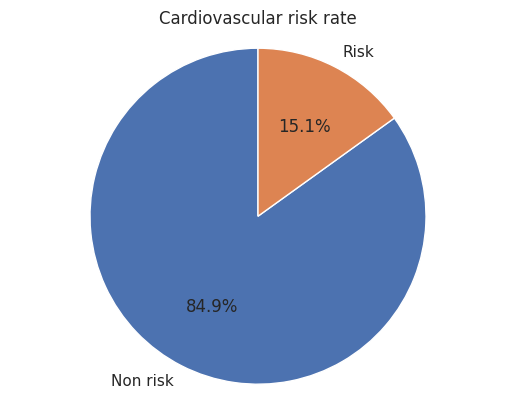

In [ ]:
labels = ['Non risk','Risk']
sizes = df['TenYearCHD'].value_counts()/3390*100

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Cardiovascular risk rate')
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

###    **Univariant Variable Analysis**

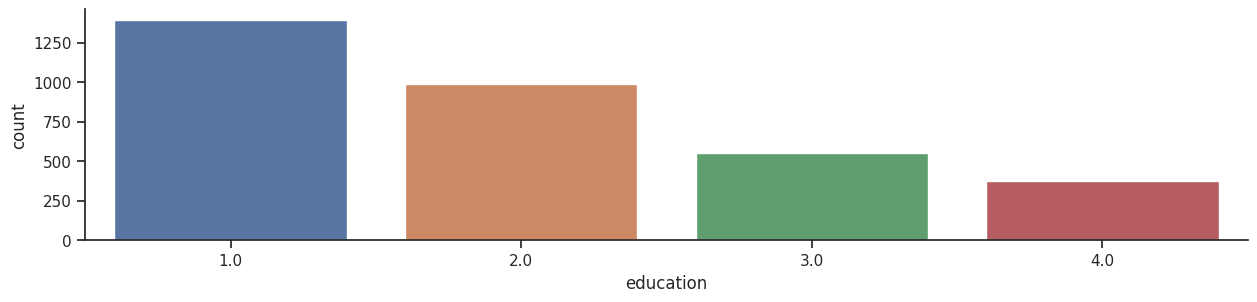

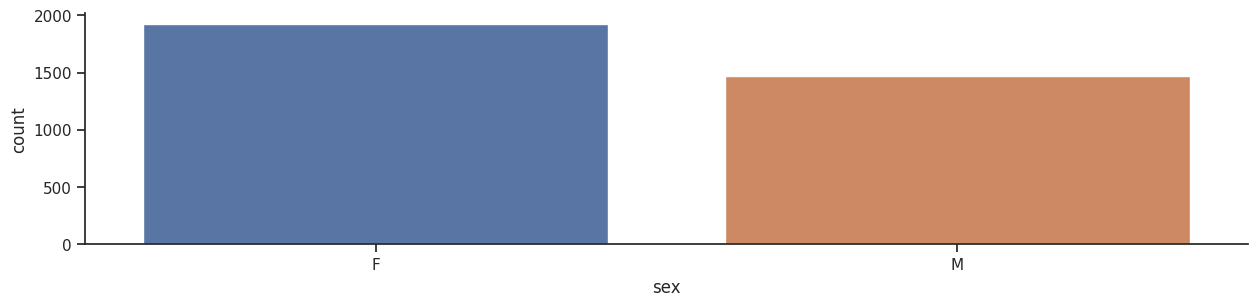

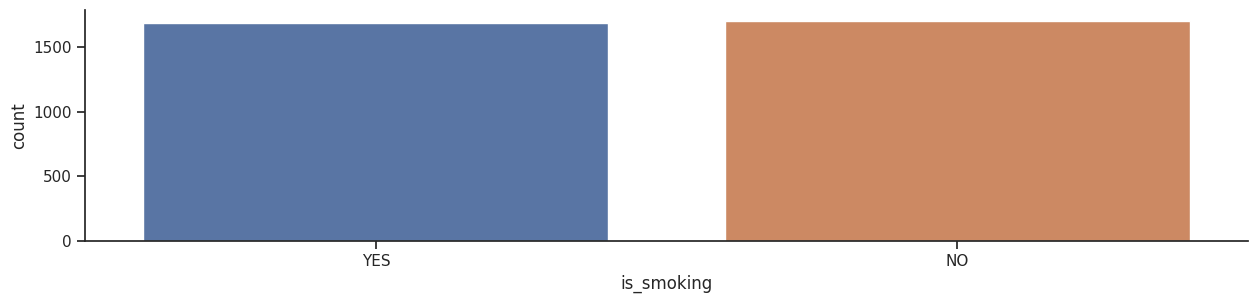

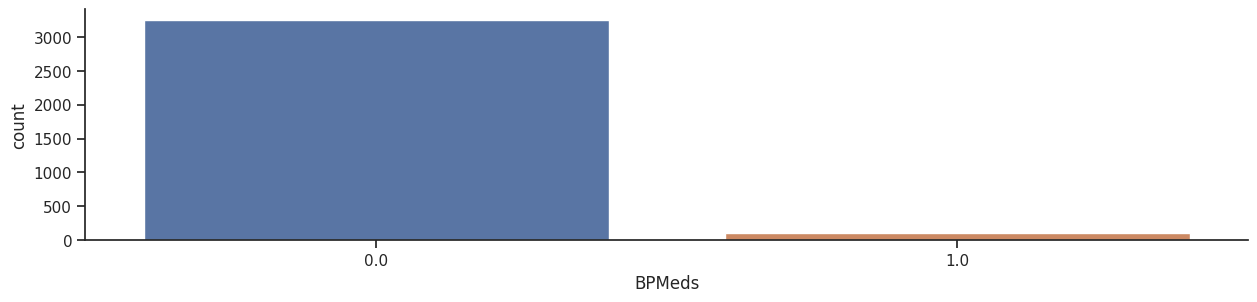

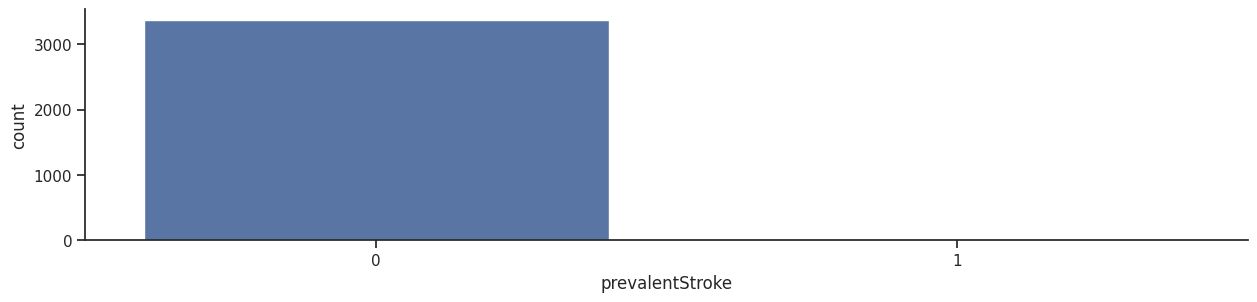

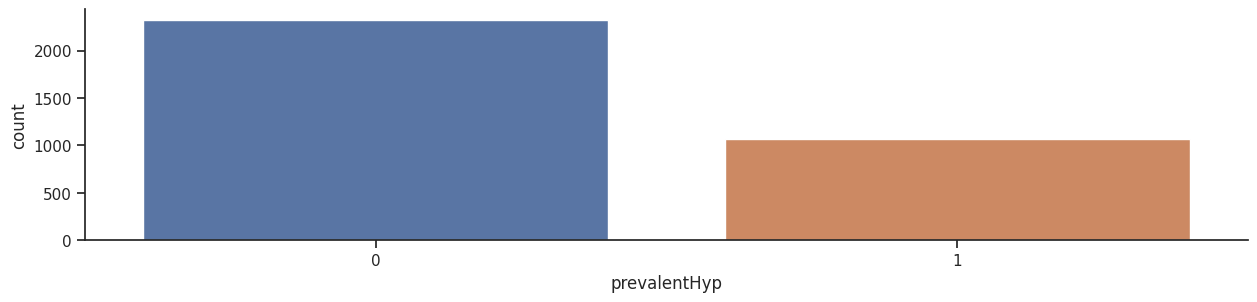

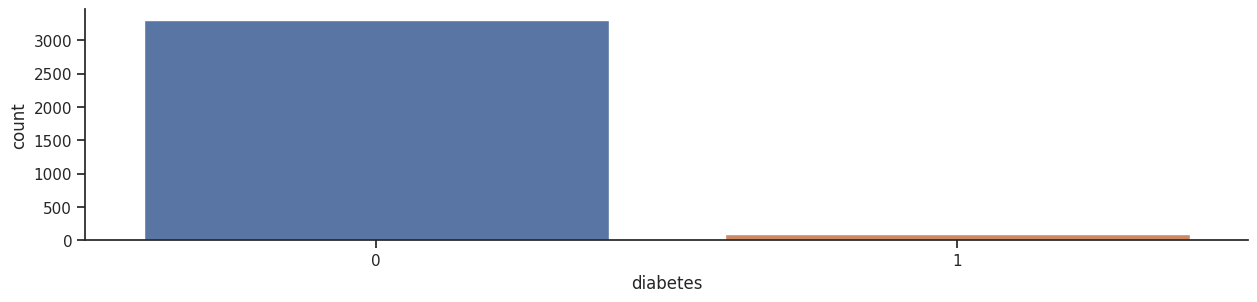

In [ ]:
# Lets Visualize the distributions of the Categorical column using count plot

plot_count_cols = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for plots in plot_count_cols:
    plt.figure(figsize=(15,3))
    sns.countplot(x=plots,data=df)
    plt.show()

Summary:
- Female count is more than male in the given dataset.
-  Ratio of non diabetic people is more than diabetic.
-  Ratio of people with prevalent Hyp is much less than people without prevalent Hyp
-  Most of the people don't suffer from any stroke.
-  Most of the people are not taking BP medicines.

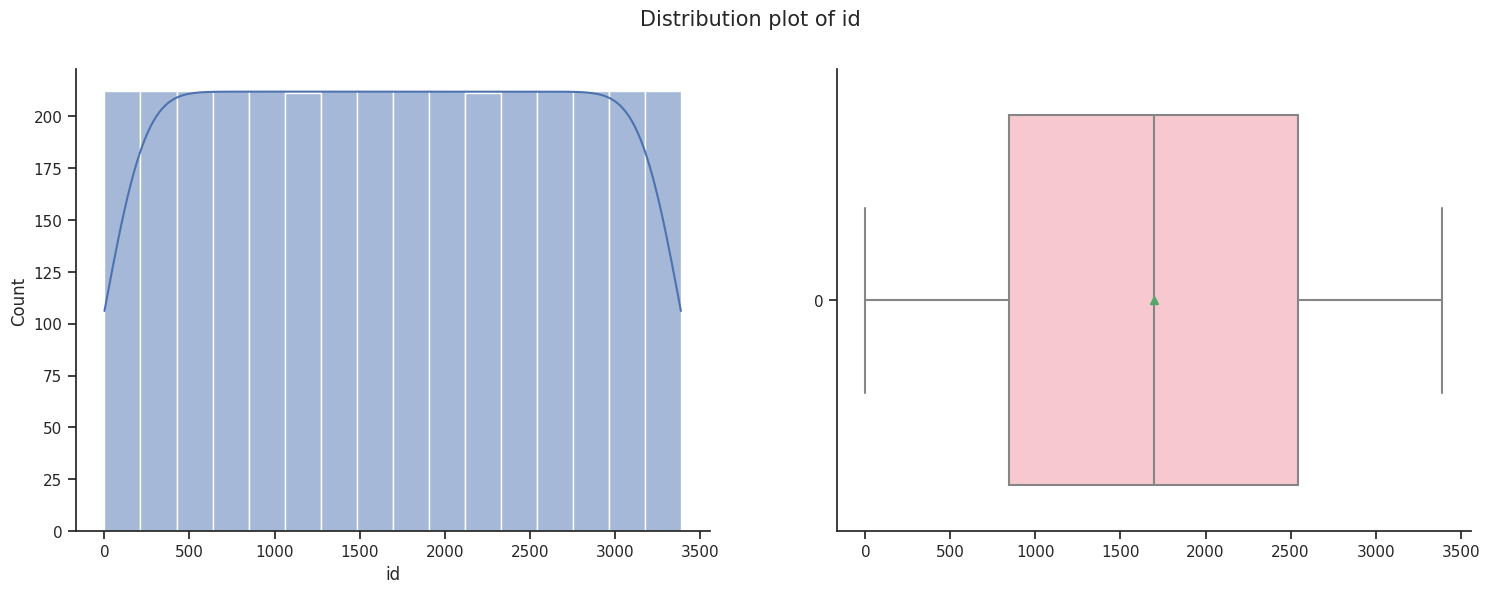

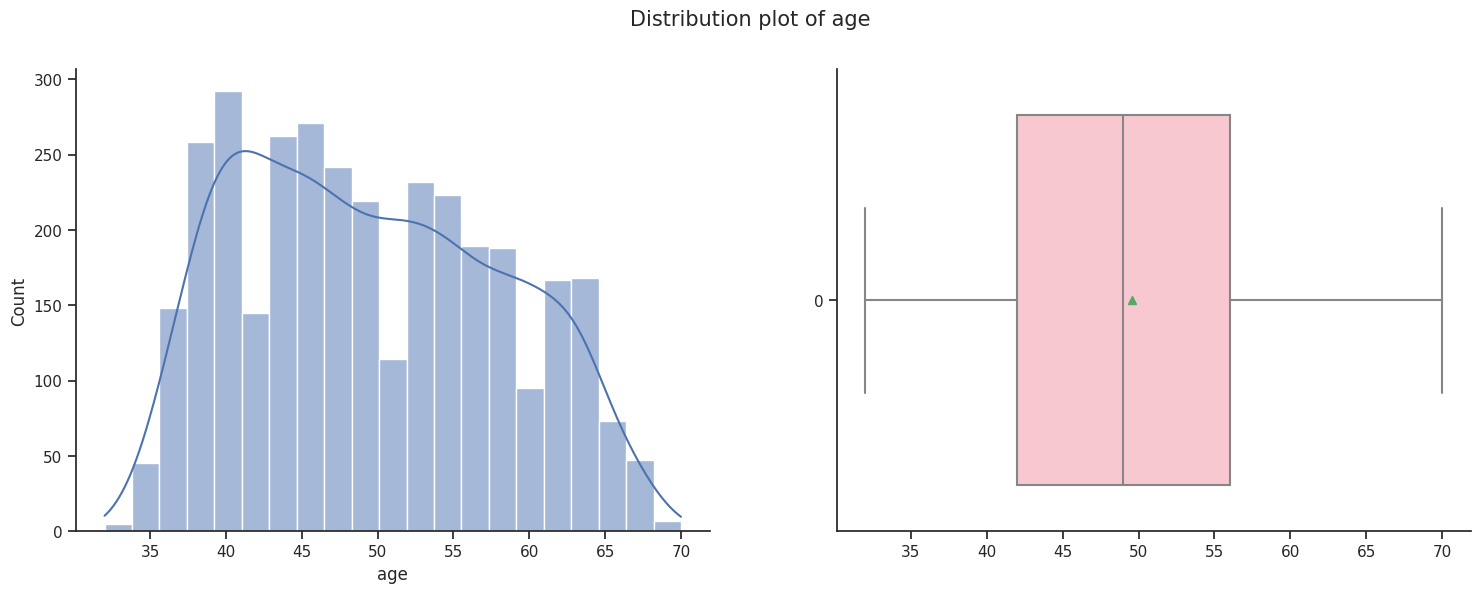

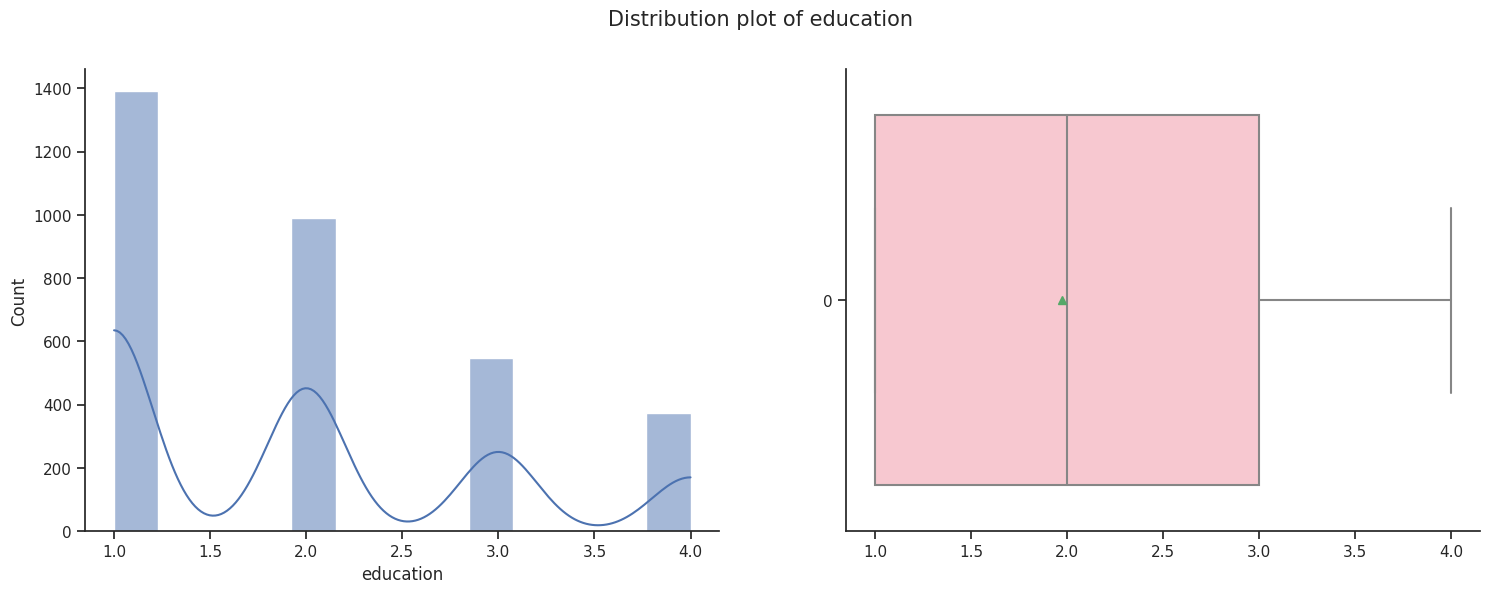

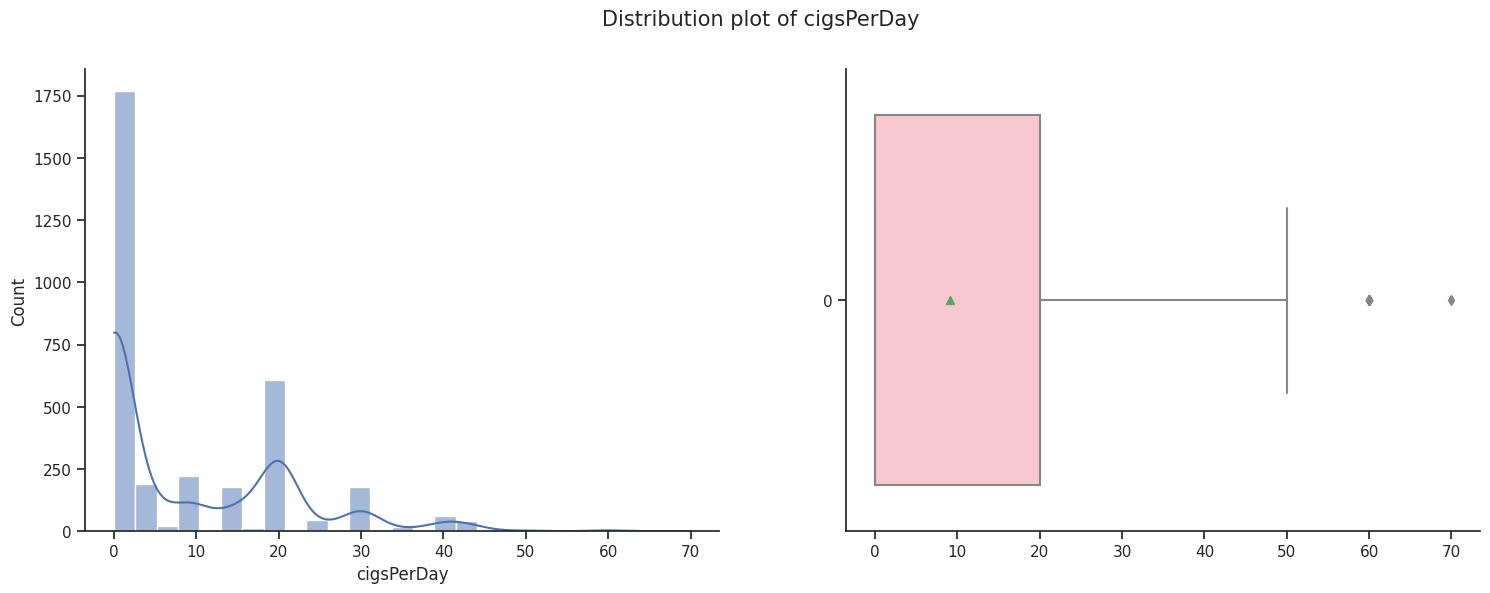

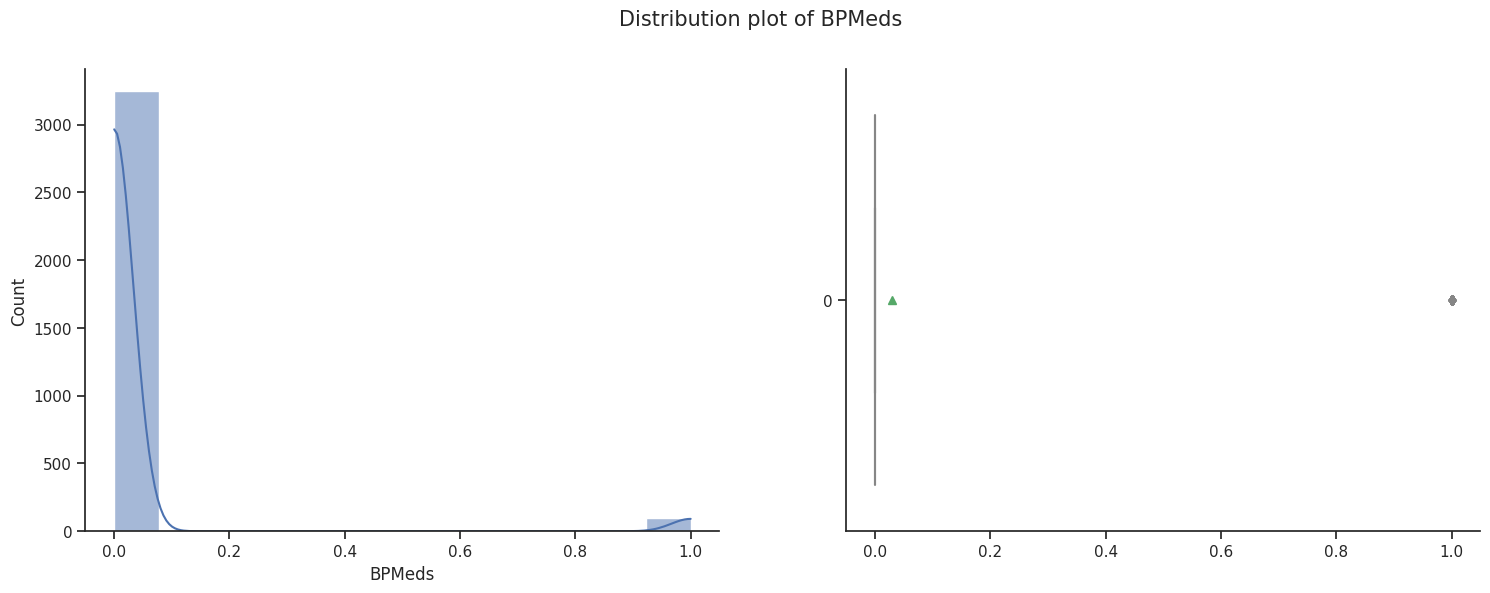

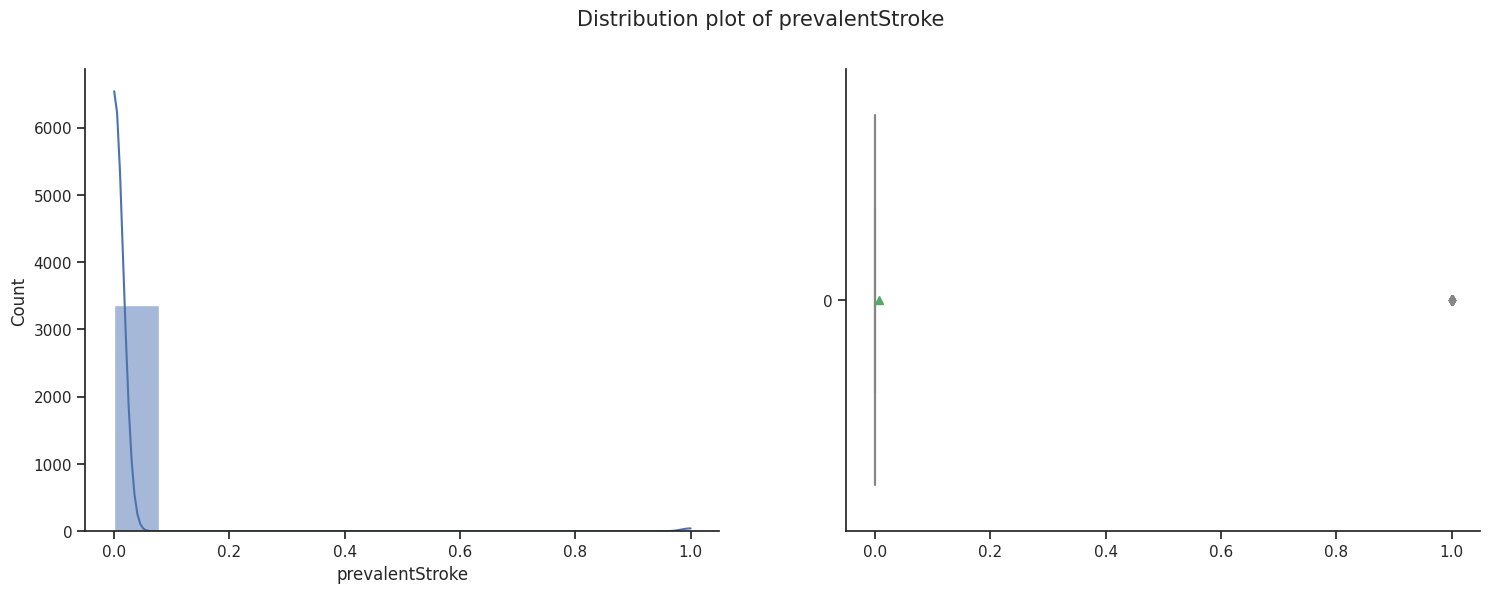

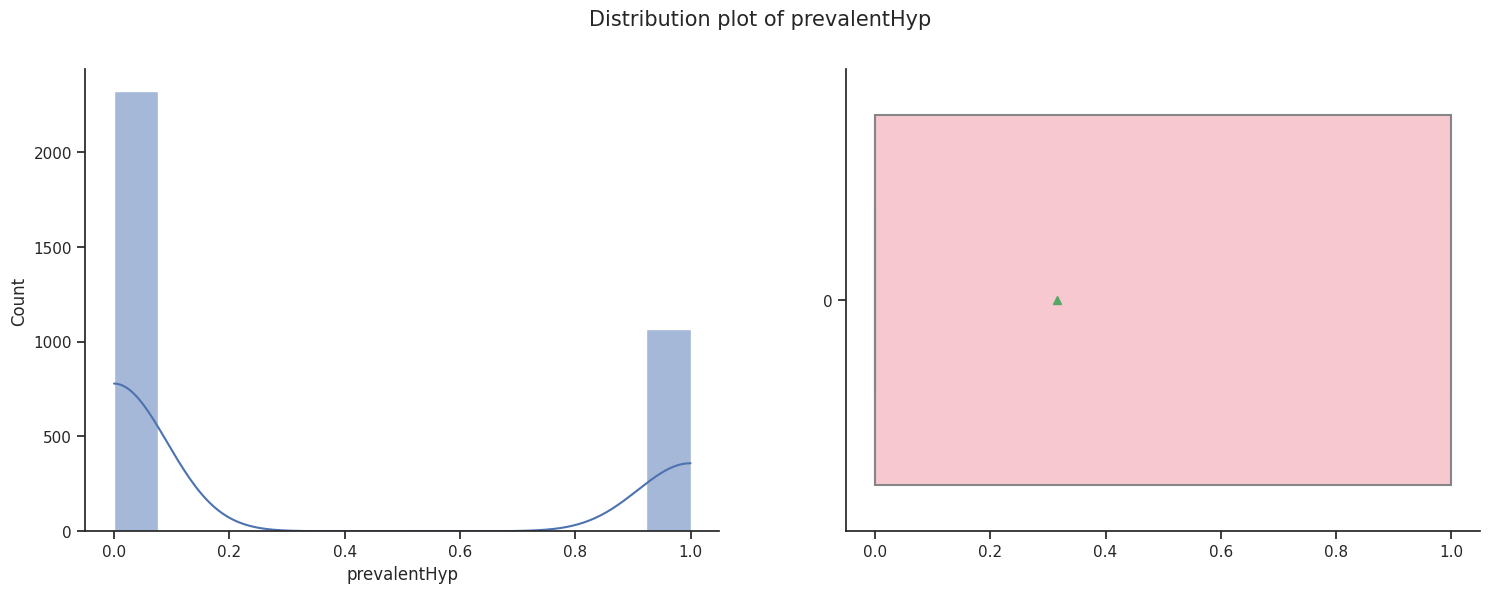

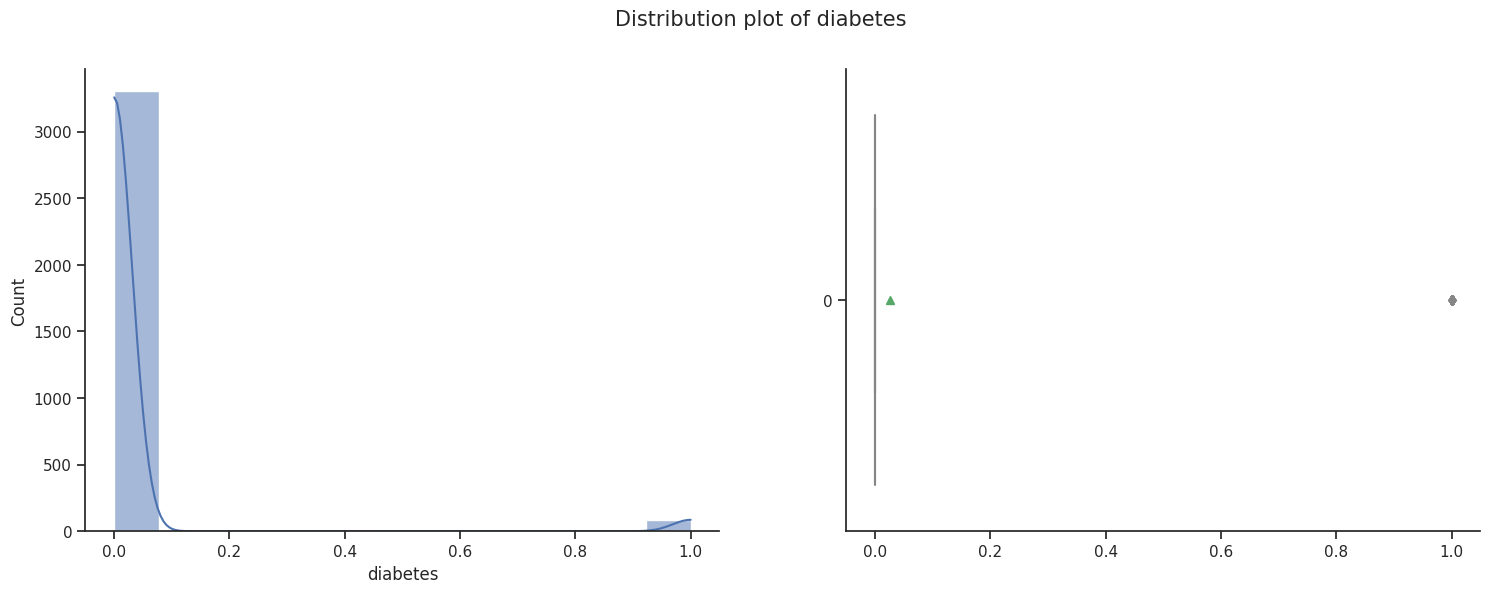

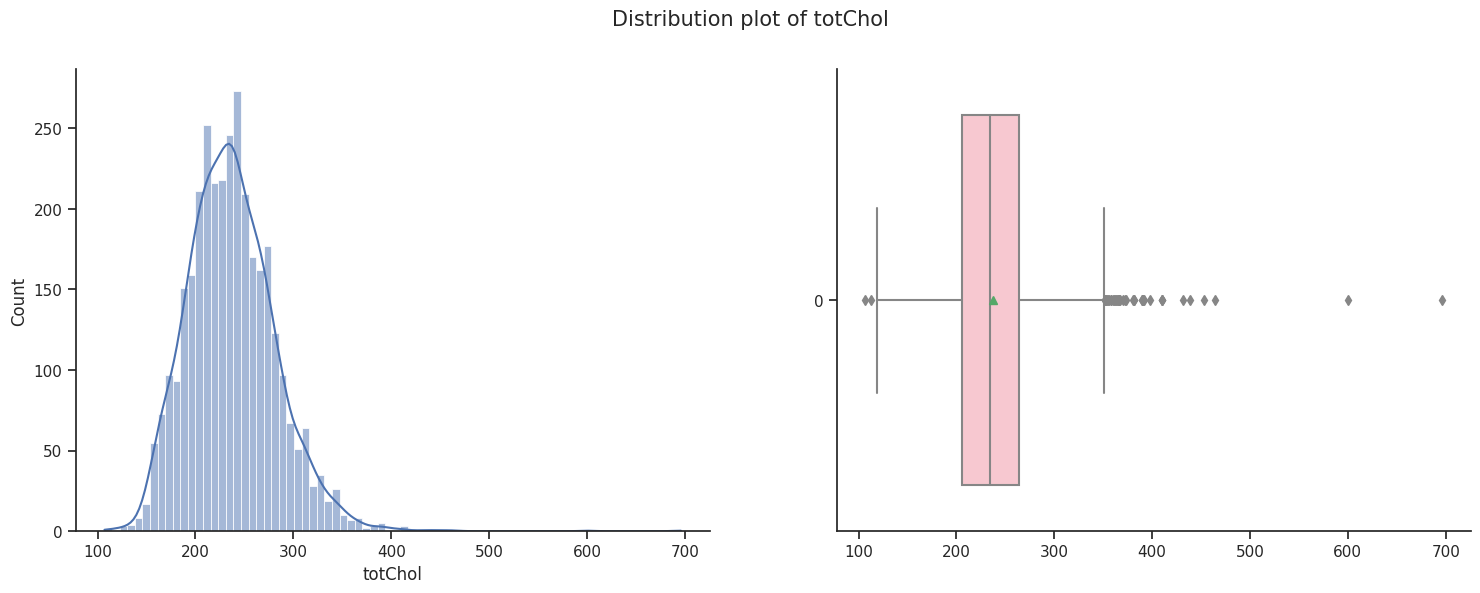

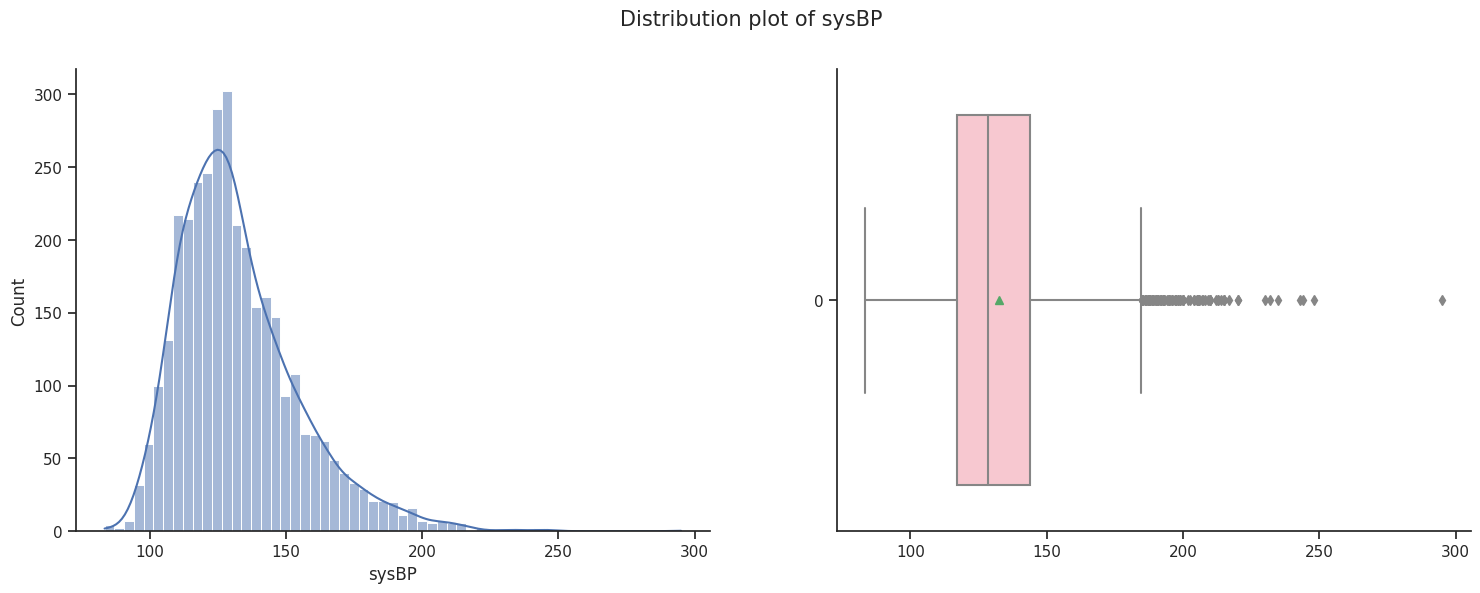

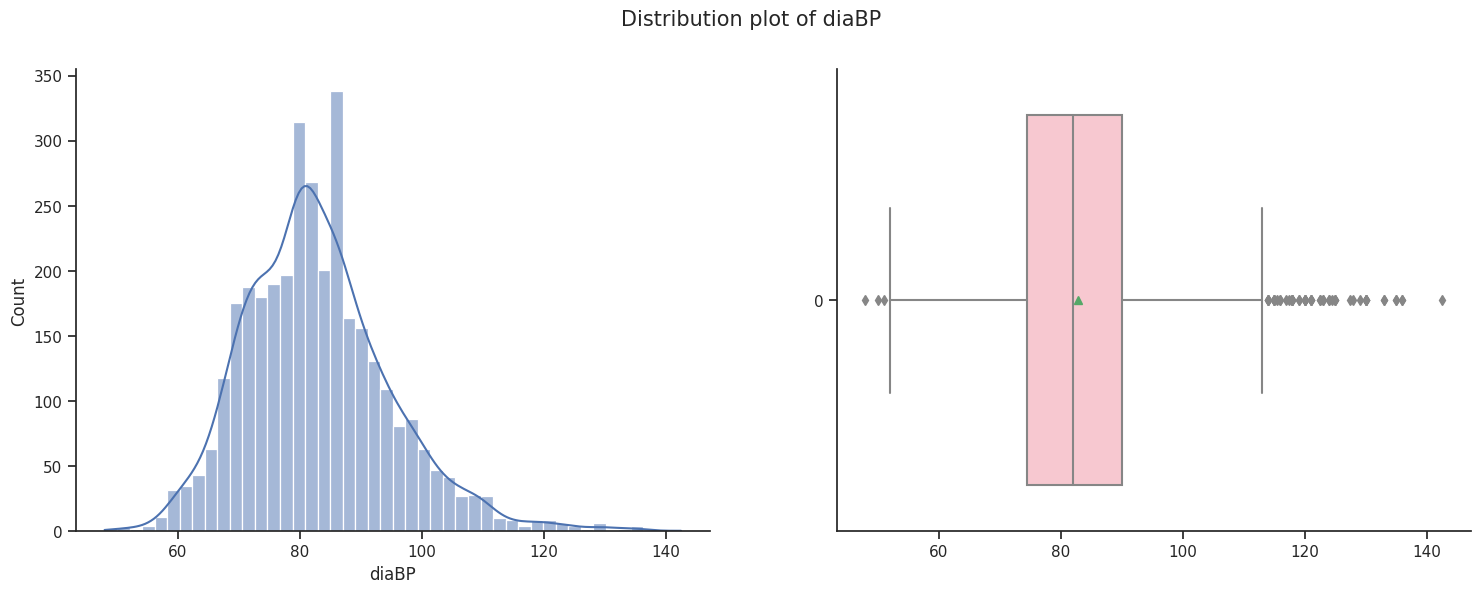

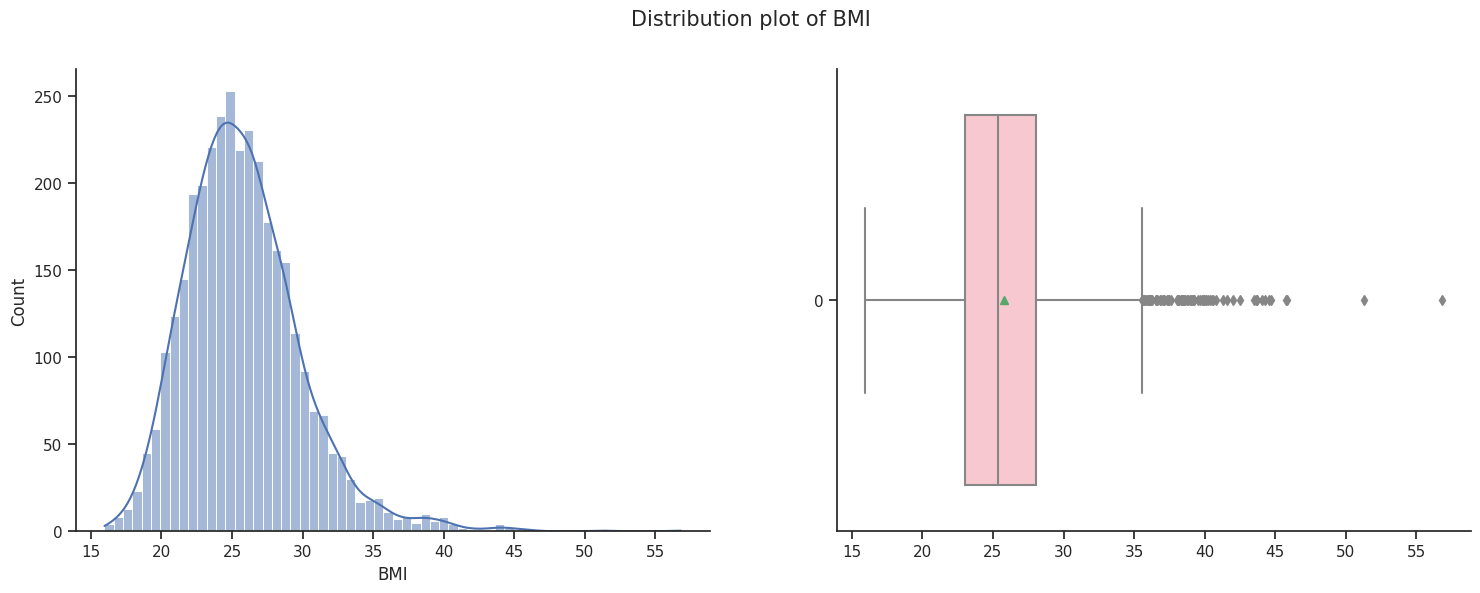

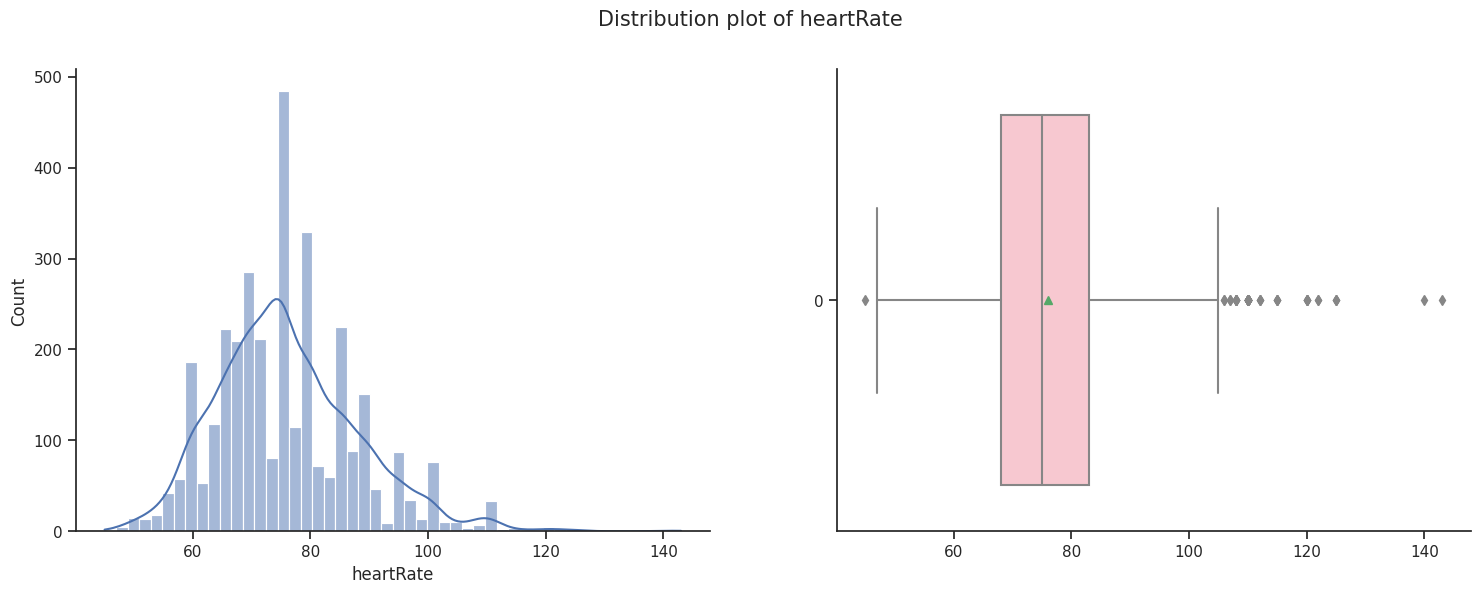

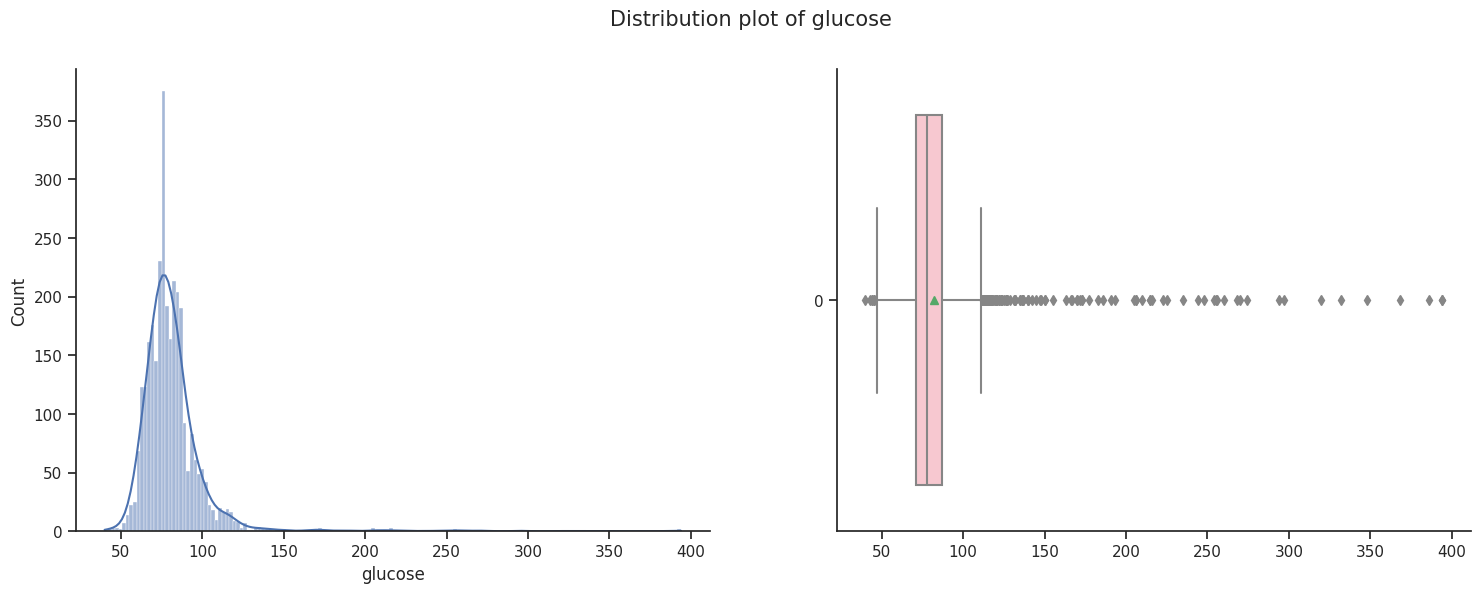

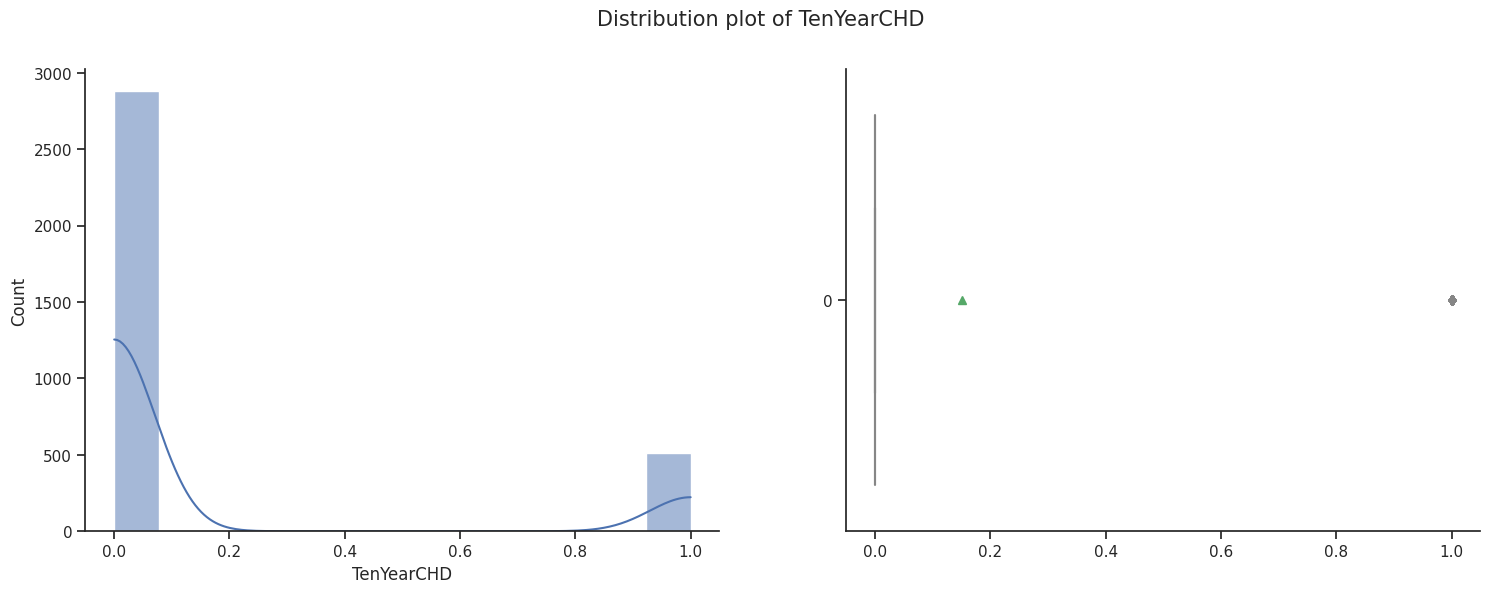

In [ ]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in df.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(df[col], ax = axes[0],kde = True)
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

**Summary**
- From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also. In the box plot, we see some outliers also which we will handle later before model building.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset and the outliers in the boxplot for the different continuous columns.

### **Bivariant Variable Analysis**

<Figure size 1000x500 with 0 Axes>

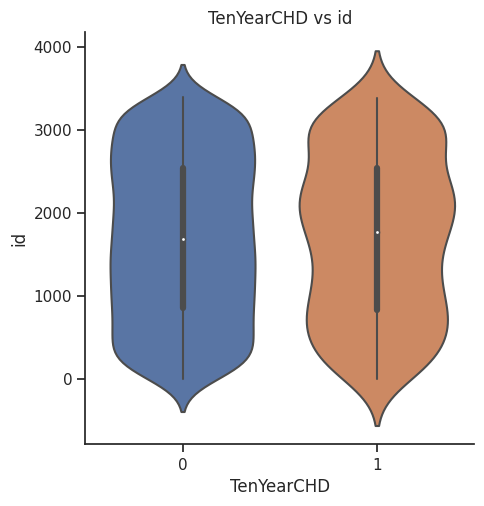

<Figure size 1000x500 with 0 Axes>

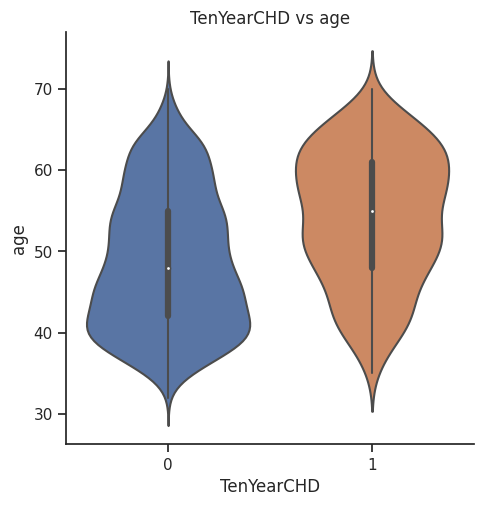

<Figure size 1000x500 with 0 Axes>

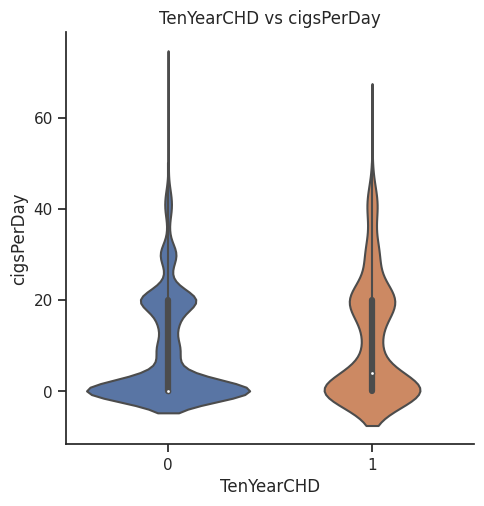

<Figure size 1000x500 with 0 Axes>

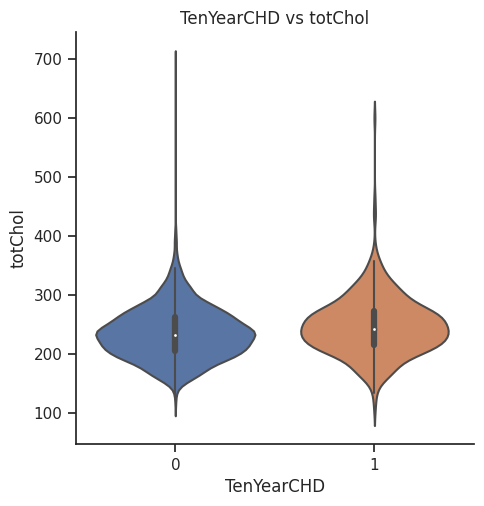

<Figure size 1000x500 with 0 Axes>

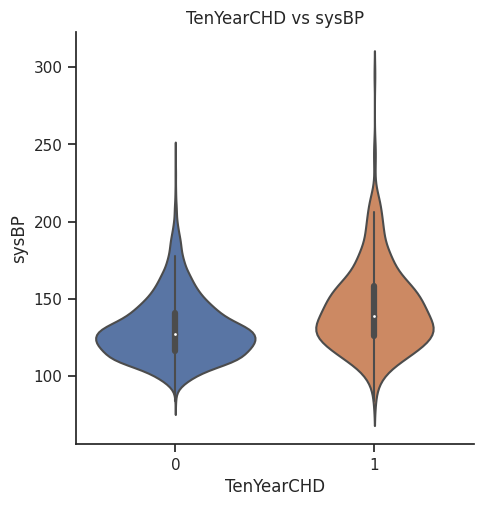

<Figure size 1000x500 with 0 Axes>

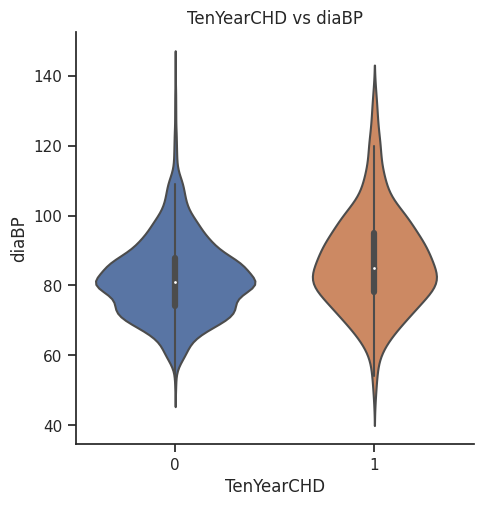

<Figure size 1000x500 with 0 Axes>

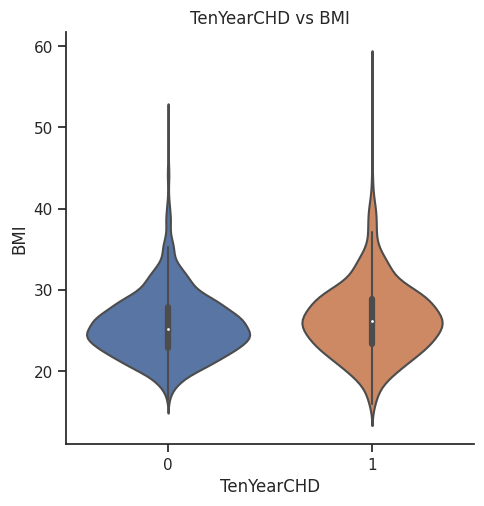

<Figure size 1000x500 with 0 Axes>

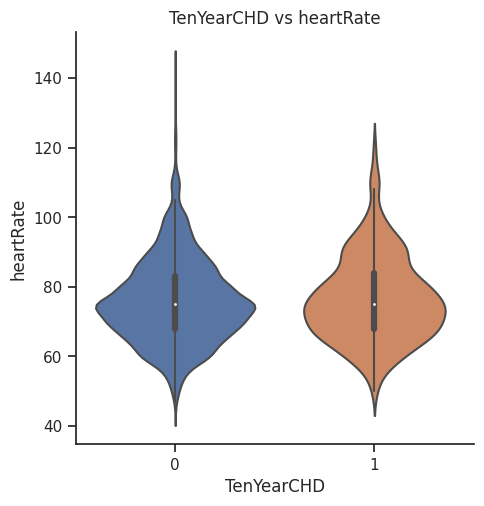

<Figure size 1000x500 with 0 Axes>

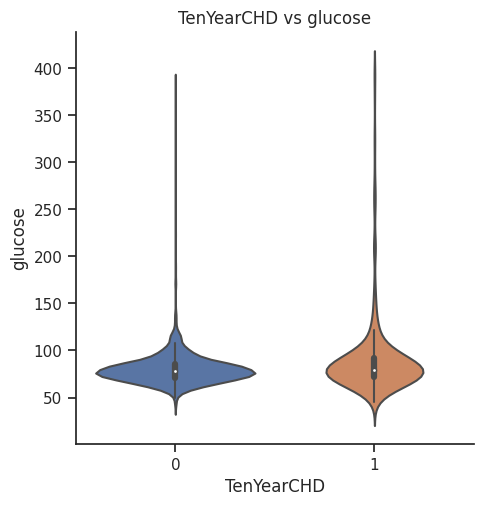

In [ ]:
# Relationship between the dependent variable and continuous/Numerical independent variables
for i in Numerical_columns:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=df,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

**Summary**

- For age vs TenYearCHD, we see that the density for positive cases is high at higher age as compared to lower age indicating that the positive cases are higher in older people.

- For cigsPerDay, the negative cases are more for the non smokers compared to the positive cases for non smokers.

- For TenYearCHD and glucose, the negative cases have high density compared to the positive cases for the same value of glucose.

- The remaining charts do not provide much information.

<Figure size 1000x500 with 0 Axes>

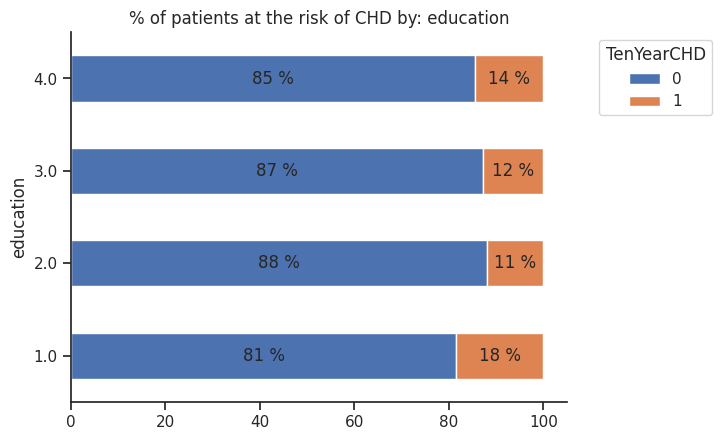

<Figure size 1000x500 with 0 Axes>

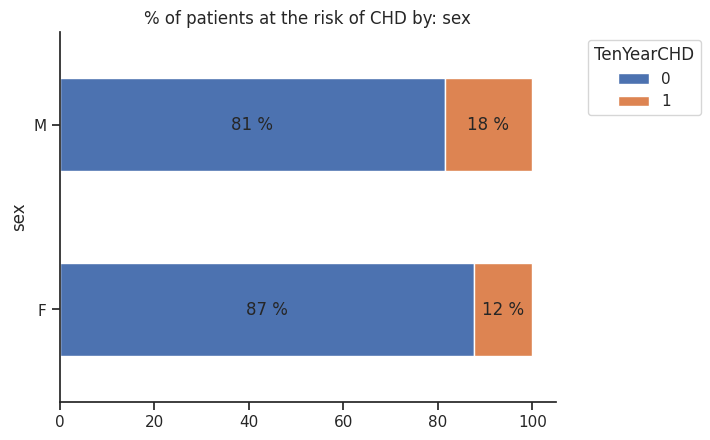

<Figure size 1000x500 with 0 Axes>

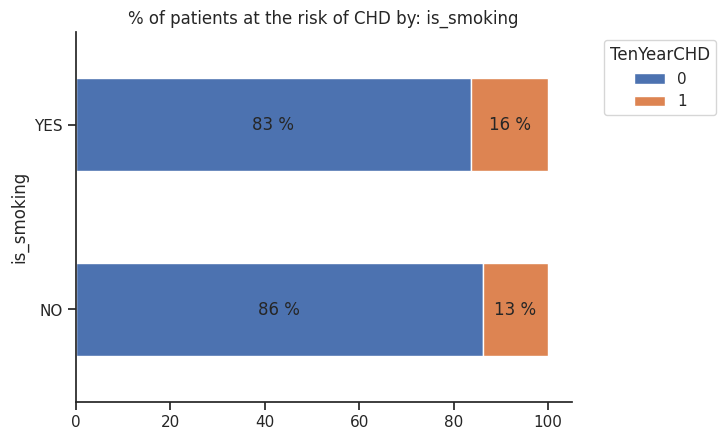

<Figure size 1000x500 with 0 Axes>

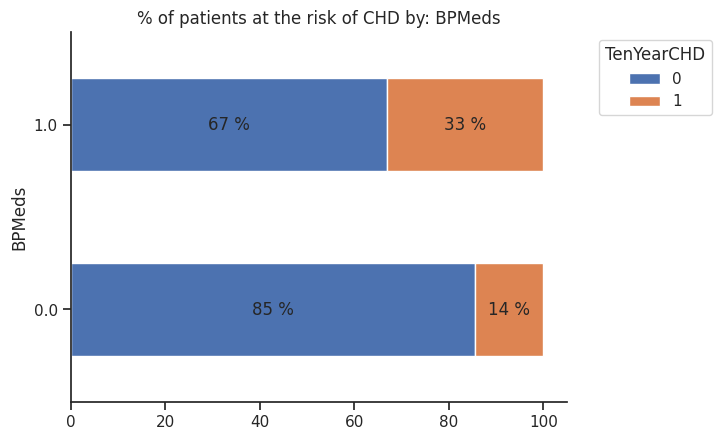

<Figure size 1000x500 with 0 Axes>

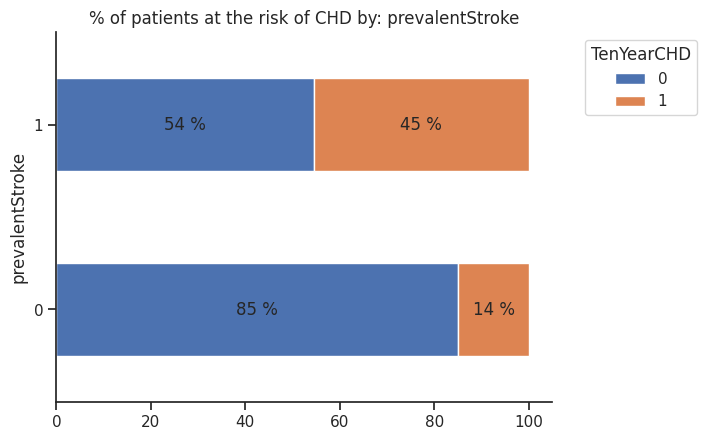

<Figure size 1000x500 with 0 Axes>

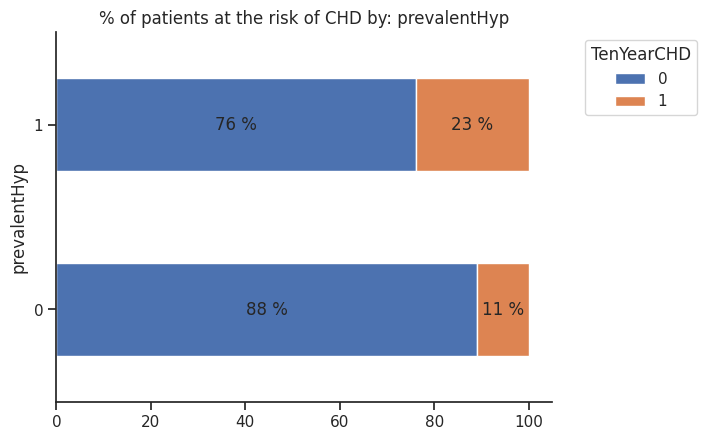

<Figure size 1000x500 with 0 Axes>

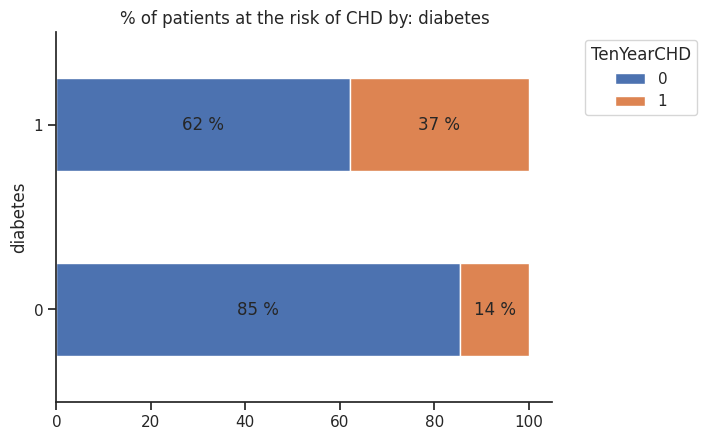

In [ ]:
# # Relationship between the dependent variable and categorical independent variables
# 100% stacked bar chart

for i in Categorical_columns[:-1]:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)

    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

**Summary**

- The percentage of CHD as per education does not provide much information as it is similar throughout the different education categories.

- For sex we see that there is a slightly higher chance of CHD in male than in female.

- For is_smoking again a very slightly high percentage of CHD is seen for the positive category of is_smoking.

- For bp_meds and diabetes, we see high percentage of CHD for positive cases compared to the negative case.

- Finally for the positive prevalent_stroke, the percentage is almost half indicating that the positive CHD is high for positive prevalent_stroke.

### **Multivariant Variable Analysis**

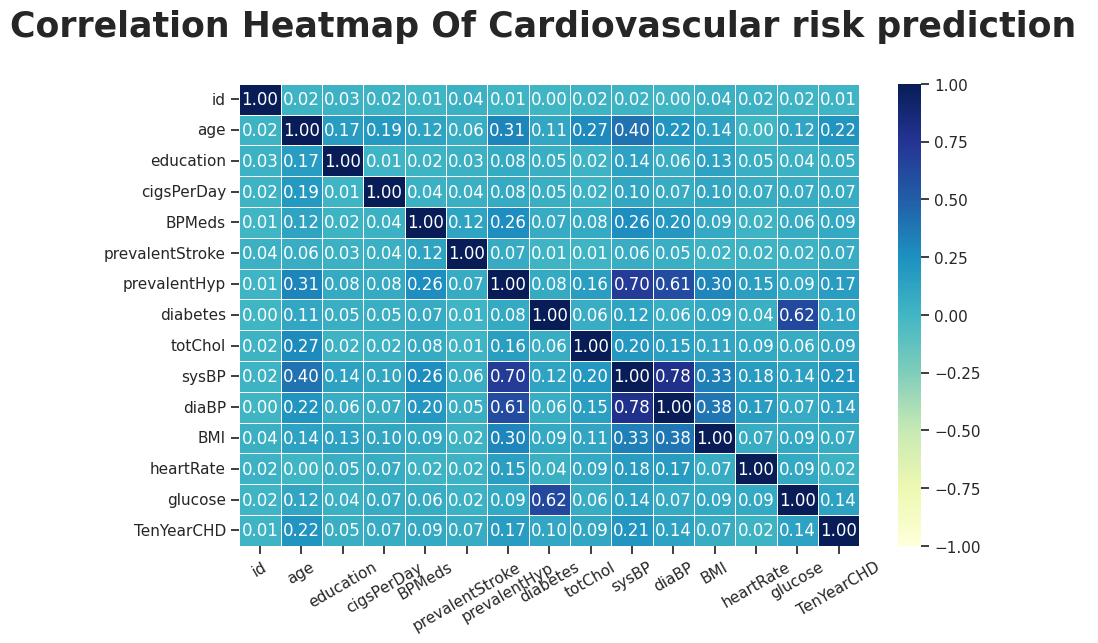

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10,6))
plot = sns.heatmap(abs(df.corr()), annot=True,vmin=-1, center = 0, cbar= True,linewidths=.5,linecolor='white',cmap="YlGnBu", fmt='.2f')
plt.title('Correlation Heatmap Of Cardiovascular risk prediction \n', weight='bold', fontsize = 25)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.show()

**Summary**
- Prevalent hypertension and systolic BP are related to age.
- Prevalent hypertension is related to systolic and diastolic BP.
- Diabetes is related with glucose level.
- Systolic and diastolic BP is related.

## **4. Feature Engineering & Data Pre-processing**

###**A.Imputing missing values**

####For categorical columns , we can replace missing values with its mode i.e most frequent value i.e eduaction and BPMeds

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0

In [ ]:
# Replacing the missing values in the categorical columns with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

####cigsPerDay

In [ ]:
# Mean and median number of cigarettes per day
df.cigsPerDay.mean().round(0),df.cigsPerDay.median()

(9.0, 0.0)

In [ ]:
# All missing values in the cigsPerDay column
df[df['cigsPerDay'].isna()]

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
422    422   55        1.0   F        YES         NaN     0.0   
466    466   45        3.0   M        YES         NaN     0.0   
469    469   42        1.0   M        YES         NaN     0.0   
491    491   61        1.0   F        YES         NaN     0.0   
538    538   41        1.0   F        YES         NaN     0.0   
767    767   54        1.0   M        YES         NaN     0.0   
1461  1461   47        2.0   F        YES         NaN     0.0   
1467  1467   49        1.0   F        YES         NaN     0.0   
1597  1597   57        1.0   F        YES         NaN     0.0   
1986  1986   49        2.0   F        YES         NaN     0.0   
2031  2031   58        4.0   F        YES         NaN     0.0   
2087  2087   49        4.0   M        YES         NaN     0.0   
2240  2240   47        3.0   F        YES         NaN     0.0   
2284  2284   45        2.0   M        YES         NaN     0.0   
2527  2527   58        2.0   M        YES         NaN     0.0   
2638  2638   57        1.0   M        YES         NaN     0.0   
2648  2648   39        2.0   M        YES         NaN     0.0   
2723  2723   43        4.0   M        YES         NaN     0.0   
2879  2879   42        1.0   M        YES         NaN     0.0   
2945  2945   53        2.0   M        YES         NaN     0.0   
3301  3301   55        1.0   M        YES         NaN     0.0   
3378  3378   39        3.0   F        YES         NaN     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
422                 0             1         0    213.0  163.0   91.0  28.66   
466                 0             1         0    170.0  145.5   99.0  26.74   
469                 0             0         0    196.0  123.0   73.0  22.06   
491                 0             1         0    356.0  168.0   98.0  27.30   
538                 0             0         0    171.0  135.0   82.5  24.35   
767                 0             0         0    219.0  110.0   72.0  26.05   
1461                0             0         0    365.0  127.0   76.0  24.44   
1467                0             0         0    252.0  123.0   69.0  21.45   
1597                0             0         0    229.0  115.0   69.0  24.43   
1986                0             1         0    233.0  158.0  102.0  25.31   
2031                0             1         0    270.0  195.0  117.5  23.35   
2087                0             0         0    256.0  127.5   81.5  28.21   
2240                0             0         0    321.0  132.0   88.0  28.14   
2284                0             0         0    248.0  121.0   72.0  27.88   
2527                0             0         0    235.0  127.5   76.0  21.02   
2638                0             0         0    223.0  107.5   72.5  24.74   
2648                0             0         0    285.0  121.0   82.0  27.62   
2723                0             0         0    222.0  109.5   69.0  25.50   
2879                0             0         0    226.0  119.0   80.0  25.29   
2945                0             0         0    276.0  130.0   86.0  24.21   
3301                0             0         0    214.0  132.5   85.5  29.25   
3378                0             0         0    197.0  126.5   76.5  19.71   

      heartRate  glucose  TenYearCHD  
422        69.0     66.0           0  
466        83.0     85.0           0  
469        66.0      NaN           0  
491       103.0    106.0           0  
538        79.0     82.0           0  
767        95.0     86.0           0  
1461       72.0     80.0           0  
1467       72.0     89.0           0  
1597       80.0     93.0           0  
1986       90.0     72.0           0  
2031       75.0      NaN           0  
2087       93.0     85.0           1  
2240       90.0     74.0           0  
2284       64.0     88.0           0  
2527       81.0    135.0           0  
2638       62.0    103.0           0  
2648       85.0     65.0       

It is observed that the missing value of the cigs per day for all entry has the 'is smoking' column as YES that is they smoke.

In [ ]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
df[df['is_smoking']=='YES']['cigsPerDay'].mean(),df[df['is_smoking']=='YES']['cigsPerDay'].median()

(18.345945945945946, 20.0)

In [ ]:
# Imputing the missing values in the cigs_per_day
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[df['is_smoking']=='YES']['cigsPerDay'].median())

In [ ]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

df[(df['is_smoking']=='NO') & (df['cigsPerDay']>0)]

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [ ]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df[(df['is_smoking']=='YES') & (df['cigsPerDay']==0)]

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

It is observed that there are no incorrect entry.

#### Cholesterol - BMI - Heartrate

In [ ]:
# Mean and median for totChol
df.totChol.mean(),df.totChol.median()

(237.07428400954655, 234.0)

In [ ]:
# Mean and median for BMI
df.BMI.mean(),df.BMI.median()

(25.7949644549763, 25.38)

In [ ]:
# Mean and median for heartRate
df.heartRate.mean(),df.heartRate.median()

(75.97727943346119, 75.0)

In [ ]:
# Imputing missing values in the totChol, BMI, and heartRate with their medain values
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

#### Glucose

In [ ]:
# total missing values in glucose
df.glucose.isna().sum()

304

In [ ]:
# Mean, median, and mode for glucose
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

- In glucose column , 304 datapoints are missing. imputting missing values with mean, median , mode could lead to inaccuracies.
- Hence, KNN imputer would be better.

In [ ]:
from sklearn.impute import KNNImputer

# Reshape the input data
glucose_data = df['glucose'].values.reshape(-1, 1)

# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(glucose_data)

# Assign the imputed values back to the dataframe
df['glucose'] = imputed


In [ ]:
#Let's again check our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#Checking for missing values again
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Our data doesn't have any missing values.

###**B.Handling Outliers**

In [ ]:
Numerical_columns

['id',
 'age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
# Removing outliers
for col in Numerical_columns:
  # Using IQR method to define the range of inliners:
  q1, q3, median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with upper limit and lower limits
  df[col] = np.where(df[col] > upper_limit, upper_limit,np.where(
                         df[col] < lower_limit,lower_limit,df[col]))

###**C.Let's create some new features**

###Creating a new feature of age_group using existing age column. This feature categories people into young, middle-aged and elderly.

In [ ]:
df['Age_Group']='unknown'

# Define age group categories and corresponding conditions
age_conditions=[
    (df['age']<40),
    (df['age']>=40) & (df['age']<60),
    (df['age']>=60)
    ]

# Defining corresponding age group lables
age_groups=['Young','Middle-aged','Elderly']

# Assign the appropriate age group based on the conditions
df['Age_Group']= np.select(age_conditions,age_groups,df['Age_Group'])
df.drop('age',axis=1,inplace=True)
print(df)

          id  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0        0.0        2.0   F        YES         3.0     0.0                0   
1        1.0        4.0   M         NO         0.0     0.0                0   
2        2.0        1.0   F        YES        10.0     0.0                0   
3        3.0        1.0   M        YES        20.0     0.0                0   
4        4.0        1.0   F        YES        30.0     0.0                0   
...      ...        ...  ..        ...         ...     ...              ...   
3385  3385.0        1.0   F         NO         0.0     0.0                0   
3386  3386.0        1.0   F         NO         0.0     0.0                0   
3387  3387.0        3.0   M        YES         3.0     0.0                0   
3388  3388.0        1.0   M         NO         0.0     0.0                0   
3389  3389.0        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP   diaB

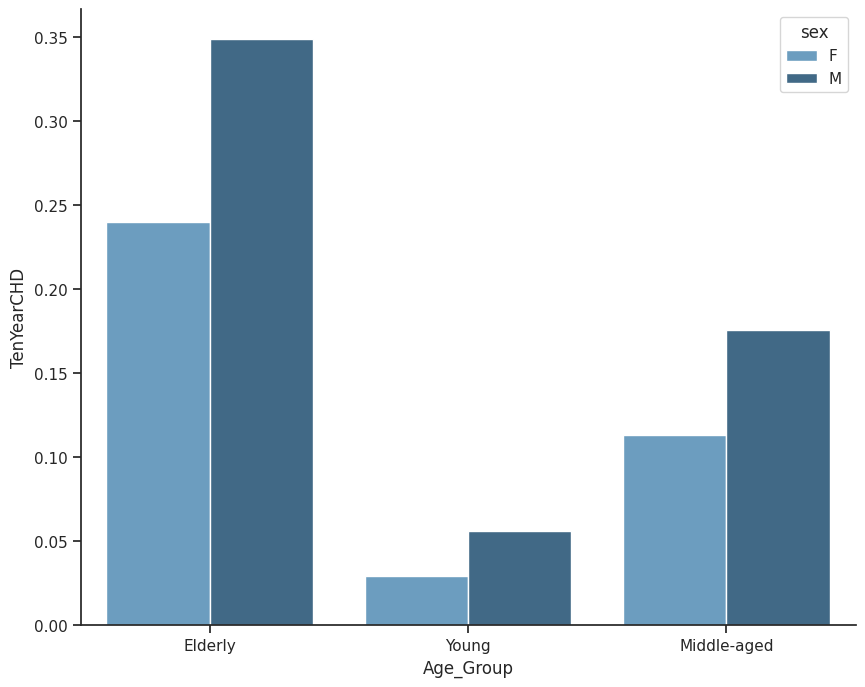

In [ ]:
# Barplot showing relation between TenYearCHD and Eduaction
plt.figure(figsize=(10,8))
plot=plt.subplot(1,1,1)
sns.barplot( x= 'Age_Group', y= 'TenYearCHD' ,hue='sex', data=df, ci=None,palette= 'Blues_d' )
plt.show()

**INSIGHTS:**

- Bar plot clearly shows that elderly people are at greater risk of CHD particularly males .

###Creating a new column of BP_Category using sysBP and diaBP

In [ ]:

df['BP_Category']='Unknown'

# Define blood pressure category ranges and corresponding conditions
bp_conditions =[
    (df['sysBP'] <120) & (df['diaBP']<80),
    (df['sysBP'] >=120) & (df['sysBP']<130) & (df['diaBP']<80),
    (df['sysBP'] >=130) & (df['sysBP']<140) | (df['diaBP']>=80) & (df['diaBP']<90),
    (df['sysBP']>=140) | (df['diaBP']>=90)
    ]

# Define the corresponding blood pressure category labels
bp_groups= ['Normal','Elevated','Hypertension stage 1','Hypertension stage 2']

# Assign the appropriate blood pressure category based on the conditions
df['BP_Category']= np.select(bp_conditions,bp_groups,df['BP_Category'])

df.drop(['sysBP','diaBP'],axis=1,inplace=True)

print(df)

          id  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0        0.0        2.0   F        YES         3.0     0.0                0   
1        1.0        4.0   M         NO         0.0     0.0                0   
2        2.0        1.0   F        YES        10.0     0.0                0   
3        3.0        1.0   M        YES        20.0     0.0                0   
4        4.0        1.0   F        YES        30.0     0.0                0   
...      ...        ...  ..        ...         ...     ...              ...   
3385  3385.0        1.0   F         NO         0.0     0.0                0   
3386  3386.0        1.0   F         NO         0.0     0.0                0   
3387  3387.0        3.0   M        YES         3.0     0.0                0   
3388  3388.0        1.0   M         NO         0.0     0.0                0   
3389  3389.0        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol    BMI  heart

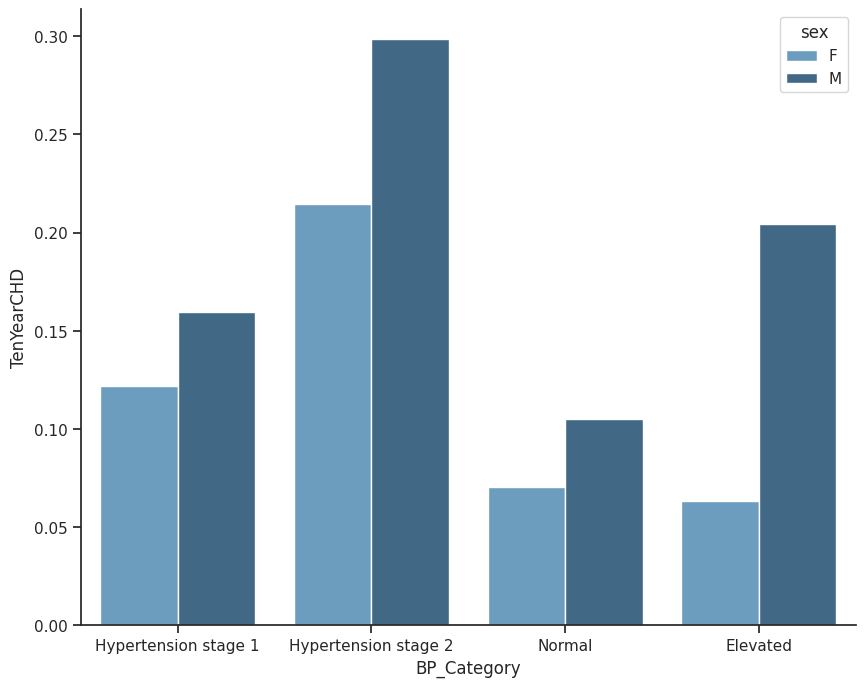

In [ ]:
# Barplot showing relation between BP categories and TenYearCHD
plt.figure(figsize=(10,8))
plot=plt.subplot(1,1,1)

sns.barplot( x= 'BP_Category',y='TenYearCHD',data=df, hue='sex',ci=None, palette= 'Blues_d' )
plt.show()

**INSIGHTS:**

- Bar plot clearly shows that Hypertension stage 2 people are at greater risk of CHD particularly males

###Creating a new column of smoking_status using is_smoking and cigsPerDay.

In [ ]:
# Replace 'YES' with 1 and 'NO' with 0 in the 'is_smoking' column
df['is_smoking'] = df['is_smoking'].replace({'YES': 1, 'NO': 0})

# Print the updated DataFrame
print(df)


          id  education sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0        0.0        2.0   F           1         3.0     0.0                0   
1        1.0        4.0   M           0         0.0     0.0                0   
2        2.0        1.0   F           1        10.0     0.0                0   
3        3.0        1.0   M           1        20.0     0.0                0   
4        4.0        1.0   F           1        30.0     0.0                0   
...      ...        ...  ..         ...         ...     ...              ...   
3385  3385.0        1.0   F           0         0.0     0.0                0   
3386  3386.0        1.0   F           0         0.0     0.0                0   
3387  3387.0        3.0   M           1         3.0     0.0                0   
3388  3388.0        1.0   M           0         0.0     0.0                0   
3389  3389.0        3.0   F           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  

In [ ]:
df['Smoking_Status']='Unknown'

# Define smoking status conditions and corresponding categories
smoking_conditions = [
    (df['is_smoking']==0) | (df['cigsPerDay']==0),
    (df['is_smoking']==1) & (df['cigsPerDay']>0) & (df['cigsPerDay']<=10),
    (df['is_smoking']==1) & (df['cigsPerDay']>10),

]

smoking_groups=['Non-Smoker','Light Smoker','Heavy Smoker' ]

# Assign the appropriate smoking status category based on the conditions

df['Smoking_Status']= np.select(smoking_conditions,smoking_groups,df['Smoking_Status'])

#Dropping redundant column
df.drop(['is_smoking','cigsPerDay'],axis=1,inplace=True)
print(df)

          id  education sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0        0.0        2.0   F     0.0                0             0         0   
1        1.0        4.0   M     0.0                0             1         0   
2        2.0        1.0   F     0.0                0             0         0   
3        3.0        1.0   M     0.0                0             1         0   
4        4.0        1.0   F     0.0                0             0         0   
...      ...        ...  ..     ...              ...           ...       ...   
3385  3385.0        1.0   F     0.0                0             0         0   
3386  3386.0        1.0   F     0.0                0             0         0   
3387  3387.0        3.0   M     0.0                0             1         0   
3388  3388.0        1.0   M     0.0                0             1         0   
3389  3389.0        3.0   F     0.0                0             0         0   

      totChol    BMI  heartRate  glucos

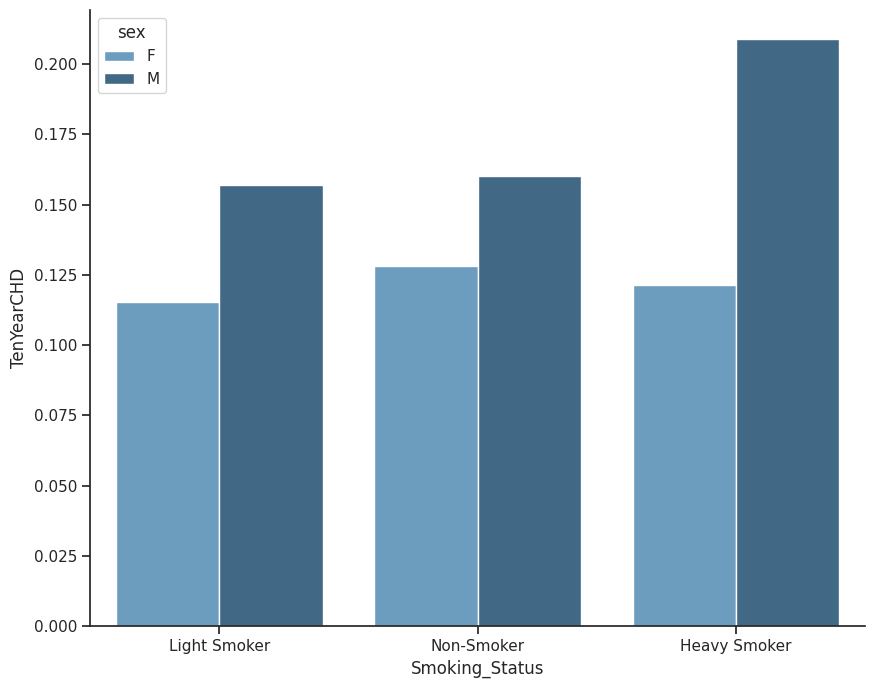

In [ ]:
# Bar plot showing relation between smoking_status and TenYearCHD

plt.figure(figsize=(10,8))
plot=plt.subplot(1,1,1)
sns.barplot( x= 'Smoking_Status', y= 'TenYearCHD', data=df, hue='sex',ci= None, palette= 'Blues_d' )
plt.show()

**INSIGHTS:**

- Bar plot clearly shows that Heavy Smoker people are at greater risk of CHD particularly males .

###Creating a new column of BMI_Category using BMI.

In [ ]:
# Creating new BMI_category column
df['BMI_Category']= 'Unknown'

# Define BMI categories and corresponding conditions
BMI_conditions=[
    (df['BMI']< 18.5),
    (df['BMI']>=18.5) & (df['BMI']<25),
    (df['BMI']>=25) & (df['BMI']<30),
    (df['BMI']>=30)
    ]

# Defining corresponding BMI_groups lables
BMI_groups=['Underweight','Normal weight','Overweight','Obese']

# Assign the appropriate BMI_groups based on the conditions
df['BMI_Category']= np.select(BMI_conditions,BMI_groups,df['BMI_Category'])
df.drop('BMI',axis=1,inplace=True)
print(df)

          id  education sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0        0.0        2.0   F     0.0                0             0         0   
1        1.0        4.0   M     0.0                0             1         0   
2        2.0        1.0   F     0.0                0             0         0   
3        3.0        1.0   M     0.0                0             1         0   
4        4.0        1.0   F     0.0                0             0         0   
...      ...        ...  ..     ...              ...           ...       ...   
3385  3385.0        1.0   F     0.0                0             0         0   
3386  3386.0        1.0   F     0.0                0             0         0   
3387  3387.0        3.0   M     0.0                0             1         0   
3388  3388.0        1.0   M     0.0                0             1         0   
3389  3389.0        3.0   F     0.0                0             0         0   

      totChol  heartRate  glucose  TenY

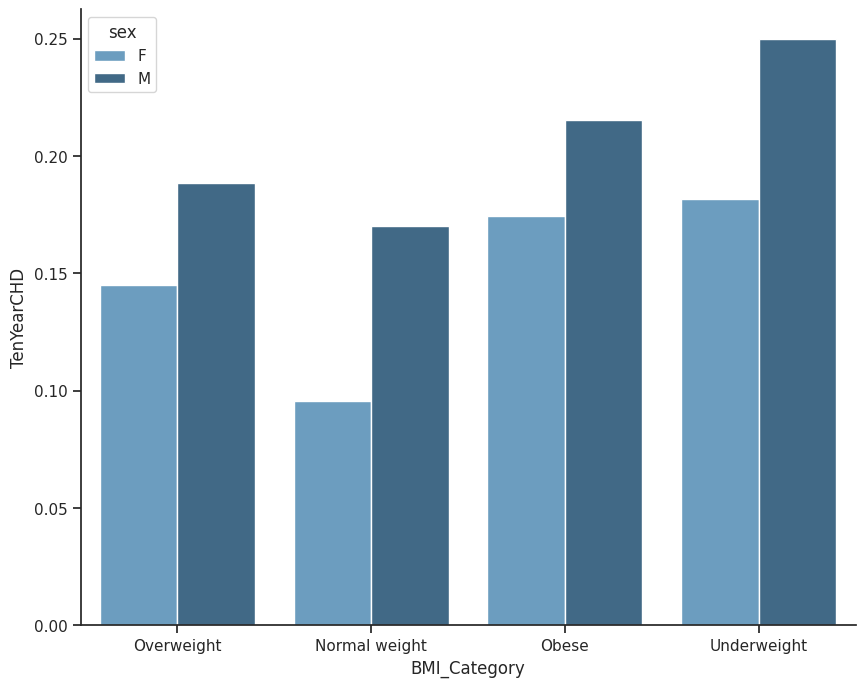

In [ ]:
# Bar plot showing relation between BMI and TenYearCHD

plt.figure(figsize=(10,8))
plot=plt.subplot(1,1,1)
sns.barplot( x= 'BMI_Category', y= 'TenYearCHD', data=df, hue='sex',ci= None, palette= 'Blues_d' )
plt.show()

**INSIGHTS:**

- Bar plot clearly shows that Underweight people are at greater risk of CHD and in all categories males are at greater risk.

### Creating a new column of Cholesterol_Category using totChol.

In [ ]:
# Define the category ranges for cholesterol levels
desirable_range = (0, 200)
borderline_high_range = (200, 240)
high_range = (240, float('inf'))

# Create a new column 'Cholesterol_Category' with default value 'Unknown'
df['Cholesterol_Category'] = 'Unknown'

# Assign the category based on cholesterol levels
df.loc[df['totChol'].between(*desirable_range), 'Cholesterol_Category'] = 'Desirable'
df.loc[df['totChol'].between(*borderline_high_range), 'Cholesterol_Category'] = 'Borderline High'
df.loc[df['totChol'].between(*high_range), 'Cholesterol_Category'] = 'High'

# Drop totChol column
df.drop('totChol',axis=1,inplace=True)

# Print the updated DataFrame
print(df)


          id  education sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0        0.0        2.0   F     0.0                0             0         0   
1        1.0        4.0   M     0.0                0             1         0   
2        2.0        1.0   F     0.0                0             0         0   
3        3.0        1.0   M     0.0                0             1         0   
4        4.0        1.0   F     0.0                0             0         0   
...      ...        ...  ..     ...              ...           ...       ...   
3385  3385.0        1.0   F     0.0                0             0         0   
3386  3386.0        1.0   F     0.0                0             0         0   
3387  3387.0        3.0   M     0.0                0             1         0   
3388  3388.0        1.0   M     0.0                0             1         0   
3389  3389.0        3.0   F     0.0                0             0         0   

      heartRate  glucose  TenYearCHD   

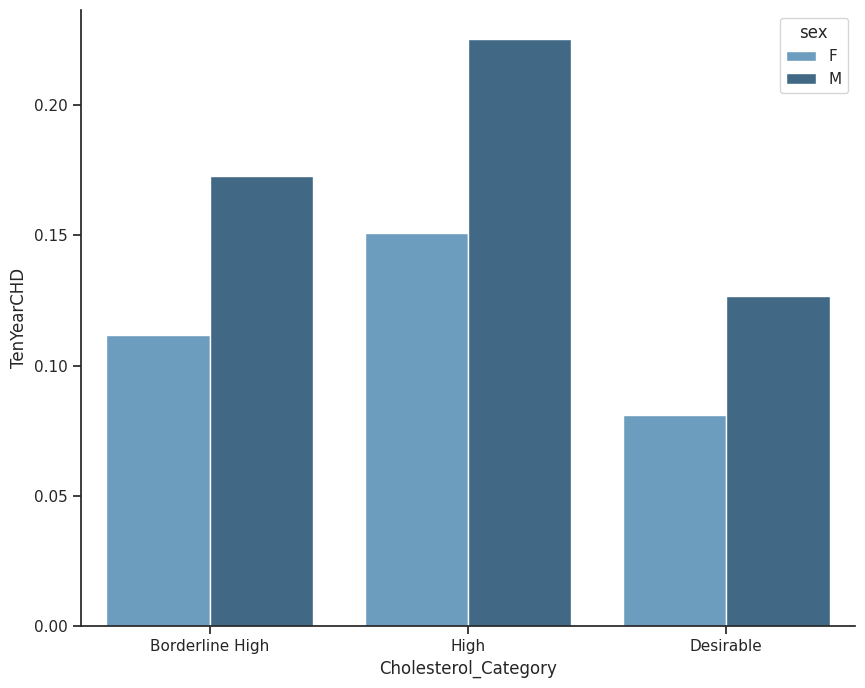

In [ ]:
# Bar plot showing relation between BMI and TenYearCHD

plt.figure(figsize=(10,8))
plot=plt.subplot(1,1,1)
sns.barplot( x= 'Cholesterol_Category', y= 'TenYearCHD', data=df, hue='sex',ci= None, palette= 'Blues_d' )
plt.show()

In [ ]:
df.head()

id  education sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0  0.0        2.0   F     0.0                0             0         0   
1  1.0        4.0   M     0.0                0             1         0   
2  2.0        1.0   F     0.0                0             0         0   
3  3.0        1.0   M     0.0                0             1         0   
4  4.0        1.0   F     0.0                0             0         0   

   heartRate  glucose  TenYearCHD    Age_Group           BP_Category  \
0       90.0     80.0           1      Elderly  Hypertension stage 1   
1       72.0     75.0           0        Young  Hypertension stage 2   
2       88.0     94.0           0  Middle-aged                Normal   
3       68.0     94.0           1  Middle-aged  Hypertension stage 1   
4       70.0     77.0           0      Elderly  Hypertension stage 1   

  Smoking_Status   BMI_Category Cholesterol_Category  
0   Light Smoker     Overweight      Borderline High  
1     Non-Smoker     Overweight      Borderline High  
2   Light Smoker  Normal weight                 High  
3   Heavy Smoker     Overweight      Borderline High  
4   Heavy Smoker     Overweight                 High

### **D.Feature Selection**

In [ ]:
# Dropping redudant columns

# Drop education and id column
columns_to_drop = ['education', 'id']
df.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
df.columns

Index(['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'heartRate', 'glucose', 'TenYearCHD', 'Age_Group', 'BP_Category',
       'Smoking_Status', 'BMI_Category', 'Cholesterol_Category'],
      dtype='object')

These are final set of columns in our data set

#####Let's again define numerical and categorical columns

In [ ]:
# Check Unique Values for each variable using a for loop
for i in df.columns:
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in sex is 2
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in heartRate is 58
No. of unique values in glucose is 55
No. of unique values in TenYearCHD is 2
No. of unique values in Age_Group is 3
No. of unique values in BP_Category is 4
No. of unique values in Smoking_Status is 3
No. of unique values in BMI_Category is 4
No. of unique values in Cholesterol_Category is 3


In [ ]:
# Defining 3 lists containing the column names of
# This is defined based on the number of unique values for each attribute
dependent_var = ['TenYearCHD']

Categorical_columns1 = [i for i in df.columns if df[i].nunique()<=4]
Numerical_columns1 = [i for i in df.columns if i not in Categorical_columns1]

In [ ]:
Numerical_columns1

['heartRate', 'glucose']

In [ ]:
# Transforming data
# skewness along the index axis
(df[Numerical_columns1]).skew(axis = 0)

heartRate    0.418170
glucose      0.340097
dtype: float64

In [ ]:
# Skew for log10 transformation
np.log10(df[Numerical_columns1]+1).skew(axis = 0)

heartRate    0.027928
glucose     -0.043165
dtype: float64

In [ ]:
#Implementing log transformation on continuous variables

df['heartRate']  = np.log10(df['heartRate']+1)
df['glucose']    = np.sqrt(df['glucose'])


In [ ]:
# Checking skew after log transformation
df[Numerical_columns1].skew(axis = 0)

heartRate    0.027928
glucose      0.149588
dtype: float64

We used log transform and squareroot transform on the different continuous columns to reduce the skew of the data.

###**E.Train-Test Split**

In [ ]:
# separating the data and labels
X = df.drop(columns = 'TenYearCHD', axis=1)
Y = df['TenYearCHD']

In [ ]:
print(X)

     sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  heartRate  \
0      F     0.0                0             0         0   1.959041   
1      M     0.0                0             1         0   1.863323   
2      F     0.0                0             0         0   1.949390   
3      M     0.0                0             1         0   1.838849   
4      F     0.0                0             0         0   1.851258   
...   ..     ...              ...           ...       ...        ...   
3385   F     0.0                0             0         0   1.851258   
3386   F     0.0                0             0         0   1.908485   
3387   M     0.0                0             1         0   1.869232   
3388   M     0.0                0             1         0   1.908485   
3389   F     0.0                0             0         0   1.903090   

        glucose    Age_Group           BP_Category Smoking_Status  \
0      8.944272      Elderly  Hypertension stage 1   Light Smoker 

In [ ]:
print(Y)

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(3390, 12) (2712, 12) (678, 12)


Now as our final data set is ready , let's find out numerical and categorical columns:

In [ ]:
X_train.columns

Index(['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'heartRate', 'glucose', 'Age_Group', 'BP_Category', 'Smoking_Status',
       'BMI_Category', 'Cholesterol_Category'],
      dtype='object')

###**F.Encoding Categorical features**

In [ ]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.binary  import BinaryEncoder

In [ ]:
#Encoding 'sex' column : 0 for M and 1 for F.

label_enc = {'M': 0 , 'F':1 }

X_train['sex'] = X_train['sex'].replace(label_enc)
X_test['sex'] = X_test['sex'].replace(label_enc)

X_train.head()

sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  heartRate  \
3246    1     0.0                0             0         0   1.863323   
1481    0     0.0                0             0         0   1.707570   
1645    1     0.0                0             0         0   1.908485   
2467    1     0.0                0             0         0   1.982271   
1198    0     0.0                0             0         0   1.819544   

       glucose    Age_Group           BP_Category Smoking_Status  \
3246  9.055385  Middle-aged  Hypertension stage 1     Non-Smoker   
1481  8.944272      Elderly  Hypertension stage 1     Non-Smoker   
1645  8.831761  Middle-aged  Hypertension stage 1     Non-Smoker   
2467  9.060161  Middle-aged  Hypertension stage 1   Heavy Smoker   
1198  8.246211  Middle-aged                Normal   Light Smoker   

       BMI_Category Cholesterol_Category  
3246     Overweight            Desirable  
1481     Overweight                 High  
1645  Normal weight      Borderline High  
2467          Obese                 High  
1198  Normal weight      Borderline High

In [ ]:
# Encoding Age_Group : Young:0 , Middle aged : 1 , elderly:2

label_enc1 = {'Young': 0 , 'Middle-aged' : 1 , 'Elderly': 2}

X_train['Age_Group'] = X_train['Age_Group'].replace(label_enc1)
X_test['Age_Group'] = X_test['Age_Group'].replace(label_enc1)

X_train.head()

sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  heartRate  \
3246    1     0.0                0             0         0   1.863323   
1481    0     0.0                0             0         0   1.707570   
1645    1     0.0                0             0         0   1.908485   
2467    1     0.0                0             0         0   1.982271   
1198    0     0.0                0             0         0   1.819544   

       glucose  Age_Group           BP_Category Smoking_Status   BMI_Category  \
3246  9.055385          1  Hypertension stage 1     Non-Smoker     Overweight   
1481  8.944272          2  Hypertension stage 1     Non-Smoker     Overweight   
1645  8.831761          1  Hypertension stage 1     Non-Smoker  Normal weight   
2467  9.060161          1  Hypertension stage 1   Heavy Smoker          Obese   
1198  8.246211          1                Normal   Light Smoker  Normal weight   

     Cholesterol_Category  
3246            Desirable  
1481                 High  
1645      Borderline High  
2467                 High  
1198      Borderline High

In [ ]:
# Encoding BP_Category :'Normal':0,'Elevated':1,'Hypertension stage 1':2,'Hypertension stage 2':3

label_enc2 = {'Normal':0,'Elevated':1,'Hypertension stage 1':2,'Hypertension stage 2':3}

X_train['BP_Category'] = X_train['Age_Group'].replace(label_enc2)
X_test['BP_Category'] = X_test['Age_Group'].replace(label_enc2)

X_train.head()

sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  heartRate  \
3246    1     0.0                0             0         0   1.863323   
1481    0     0.0                0             0         0   1.707570   
1645    1     0.0                0             0         0   1.908485   
2467    1     0.0                0             0         0   1.982271   
1198    0     0.0                0             0         0   1.819544   

       glucose  Age_Group  BP_Category Smoking_Status   BMI_Category  \
3246  9.055385          1            1     Non-Smoker     Overweight   
1481  8.944272          2            2     Non-Smoker     Overweight   
1645  8.831761          1            1     Non-Smoker  Normal weight   
2467  9.060161          1            1   Heavy Smoker          Obese   
1198  8.246211          1            1   Light Smoker  Normal weight   

     Cholesterol_Category  
3246            Desirable  
1481                 High  
1645      Borderline High  
2467                 High  
1198      Borderline High

In [ ]:
# Encoding Smoking_Status : 'Non-Smoker':0 ,'Light Smoker':1 ,'Heavy Smoker':2

label_enc3 = {'Non-Smoker':0 ,'Light Smoker':1 ,'Heavy Smoker':2}

X_train['Smoking_Status'] = X_train['Smoking_Status'].replace(label_enc3)
X_test['Smoking_Status'] = X_test['Smoking_Status'].replace(label_enc3)

X_train.head()

sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  heartRate  \
3246    1     0.0                0             0         0   1.863323   
1481    0     0.0                0             0         0   1.707570   
1645    1     0.0                0             0         0   1.908485   
2467    1     0.0                0             0         0   1.982271   
1198    0     0.0                0             0         0   1.819544   

       glucose  Age_Group  BP_Category  Smoking_Status   BMI_Category  \
3246  9.055385          1            1               0     Overweight   
1481  8.944272          2            2               0     Overweight   
1645  8.831761          1            1               0  Normal weight   
2467  9.060161          1            1               2          Obese   
1198  8.246211          1            1               1  Normal weight   

     Cholesterol_Category  
3246            Desirable  
1481                 High  
1645      Borderline High  
2467                 High  
1198      Borderline High

In [ ]:
# Encoding BMI_Category : 'Non-Smoker':0 ,'Light Smoker':1 ,'Heavy Smoker':2

label_enc4 = {'Underweight': 0,'Normal weight':1 ,'Overweight':2 ,'Obese':3}

X_train['BMI_Category'] = X_train['BMI_Category'].replace(label_enc4)
X_test['BMI_Category'] = X_test['BMI_Category'].replace(label_enc4)

X_train.head()

sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  heartRate  \
3246    1     0.0                0             0         0   1.863323   
1481    0     0.0                0             0         0   1.707570   
1645    1     0.0                0             0         0   1.908485   
2467    1     0.0                0             0         0   1.982271   
1198    0     0.0                0             0         0   1.819544   

       glucose  Age_Group  BP_Category  Smoking_Status  BMI_Category  \
3246  9.055385          1            1               0             2   
1481  8.944272          2            2               0             2   
1645  8.831761          1            1               0             1   
2467  9.060161          1            1               2             3   
1198  8.246211          1            1               1             1   

     Cholesterol_Category  
3246            Desirable  
1481                 High  
1645      Borderline High  
2467                 High  
1198      Borderline High

In [ ]:
# Encoding Cholesterol_Category : 'Desirable': 0,'Borderline High':1 ,'High':2

label_enc5 = {'Desirable': 0,'Borderline High':1 ,'High':2 }

X_train['Cholesterol_Category'] = X_train['Cholesterol_Category'].replace(label_enc5)
X_test['Cholesterol_Category'] = X_test['Cholesterol_Category'].replace(label_enc5)

X_train.head()

sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  heartRate  \
3246    1     0.0                0             0         0   1.863323   
1481    0     0.0                0             0         0   1.707570   
1645    1     0.0                0             0         0   1.908485   
2467    1     0.0                0             0         0   1.982271   
1198    0     0.0                0             0         0   1.819544   

       glucose  Age_Group  BP_Category  Smoking_Status  BMI_Category  \
3246  9.055385          1            1               0             2   
1481  8.944272          2            2               0             2   
1645  8.831761          1            1               0             1   
2467  9.060161          1            1               2             3   
1198  8.246211          1            1               1             1   

      Cholesterol_Category  
3246                     0  
1481                     2  
1645                     1  
2467                     2  
1198                     1

###**G.Class Imbalanced issue and Evaluation-metric to be chosen**
---
### In this problem we have a dataset of patients where we have to find out whether on the basis of the given features or symptom a person has, he/she may have a Cardiovascular disease in future or not.

But here’s the catch… the risk rate is relatively rare, only 15% of the people have this disease.

Suppose we created ML model with this imbalanced dataset and our accuracy comes out to be 94%.

But guess what, this accuracy is misleading:
- For all non-risk patients , our accuracy will come out to be 100%.
- For all risk patients (CHD patients), our accuracy comes out to be 0 %.
- Our overall accuracy is high simply because majority of people are non-risk patients ( non- CHD patients)

This is clearly a major problem as most of the ML models are designed to maximize overal accuracy.

## The Metric Trap

When working with imbalanced datasets, the choice of evaluation metrics becomes crucial. Relying solely on simple metrics like accuracy can be deceptive. In the presence of highly imbalanced classes, a classifier can achieve high accuracy by always predicting the majority class without actually considering the underlying features. This results in an inaccurate evaluation of the model's performance. Thus, it is important to select appropriate metrics that provide a more comprehensive assessment of the model's predictive ability in imbalanced scenarios.

## For the given binary classification problem **Recall** of the ML model should be very high.
The False Negative or TypeII error should be zero

# Resampling Techniques

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

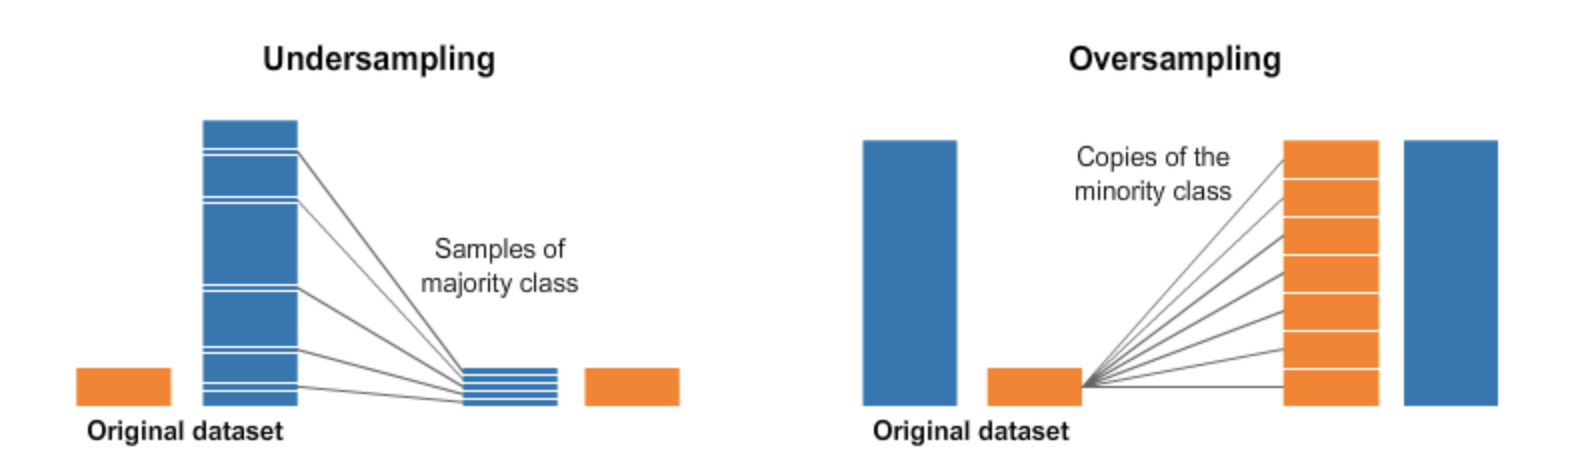

### **Random Over-Sampling**

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

###**Data Ready to be feeden**

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
#Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Evaluation metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

# from sklearn.metrics import plot_roc_curve
!pip install --upgrade scikit-learn
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score

# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###**Applying Random Oversampler**

In [ ]:
ros = RandomOverSampler(random_state=0)

#Fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X_train,Y_train)

print('Orginal dataset shape',len(Y_train),len(X_train))
print(Y.value_counts())
print('Resampled dataset shape',len(y_ros),len(x_ros))
print(y_ros.value_counts())

Orginal dataset shape 2712 2712
0    2879
1     511
Name: TenYearCHD, dtype: int64
Resampled dataset shape 4606 4606
0    2303
1    2303
Name: TenYearCHD, dtype: int64


###**Scaling**

In [ ]:
# Scaling both Train and test sets
sc_X= StandardScaler()
X_train = sc_X.fit_transform(x_ros)
X_test = sc_X.fit_transform(X_test)

In [ ]:
# scaled dataframe
pd.DataFrame(x_ros,columns= X.columns).head()

sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  heartRate   glucose  \
0    1     0.0                0             0         0   1.863323  9.055385   
1    0     0.0                0             0         0   1.707570  8.944272   
2    1     0.0                0             0         0   1.908485  8.831761   
3    1     0.0                0             0         0   1.982271  9.060161   
4    0     0.0                0             0         0   1.819544  8.246211   

   Age_Group  BP_Category  Smoking_Status  BMI_Category  Cholesterol_Category  
0          1            1               0             2                     0  
1          2            2               0             2                     2  
2          1            1               0             1                     1  
3          1            1               2             3                     2  
4          1            1               1             1                     1

## **6.Algorithm being used**
1. Logistic Regression
2. Decision Tree
3. XGBoost
4. K-Nearest Neighbors
5. Support Vector Machine
6. Random Forest
7. Neural network

In [ ]:
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    ''' This function will take model,X_train,X_test,Y_train,Y_test and return classification report , plot ROC curve , calculate confusion matrix, calculate feature importance.'''
    model.fit(X_train, Y_train)
    pred_train=model.predict(X_train)
    pred_test = model.predict(X_test)
    # print(classification_report(Y_test, pred))

    # Obtain the predicted probabilities for the positive class if the model supports it
    if hasattr(model, "predict_proba"):
        pred_prob_train=model.predict_proba(X_train)[:,1]
        pred_prob_test = model.predict_proba(X_test)[:,1]
    else:
        print("\nThe model does not support probability estimation.")
        return

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(Y_train, pred_train)
    roc_auc_test = roc_auc_score(Y_test, pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
    fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, pred_prob_test)

    # Compute the Area Under the ROC Curve (AUC)
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test=  auc(fpr_test,tpr_test)
# plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, pred_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, pred_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # Calculate confusion matrix
    cm_train = confusion_matrix(Y_train, pred_train)
    cm_test = confusion_matrix(Y_test, pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].set_title("Train Confusion Matrix")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")

    ax[1].set_title("Test Confusion Matrix")
    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")

    plt.tight_layout()
    plt.show()


      # calculate classification report
    cr_train = classification_report(Y_train, pred_train, output_dict=True)
    cr_test = classification_report(Y_test, pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    # Calculate feature importances if the model supports it
    try:
      try:
        feature_importance = model.feature_importances_
      except:
        feature_importance = model.coef_
      feature_importance = np.absolute(feature_importance)
      if len(feature_importance)==len(X_train.columns):
        pass
      else:
        feature_importance = feature_importance[0]


      feat = pd.Series(feature_importance, index=X_train.columns)
      feat = feat.sort_values(ascending=True)
      plt.figure(figsize=(10,6))
      plt.title('Feature Importances for '+str(model), fontsize = 18)
      plt.xlabel('Relative Importance')
      feat.plot(kind='barh')
    except AttributeError:
        print("\nThe model does not have feature importances attribute.")


    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = Y_train, y_pred = pred_train)
    acc_test = accuracy_score(y_true = Y_test, y_pred = pred_test)

    model_score = [recall_train, recall_test, acc_train, acc_test ]
    return model_score


In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['Recall Train','Recall Test','Accuracy Train', 'Accuracy Test'])

###**1. Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# model is trained (fit ) and predicted in the evaluate model


Train ROC AUC: 0.6656534954407295
Test ROC AUC: 0.5733762254901961


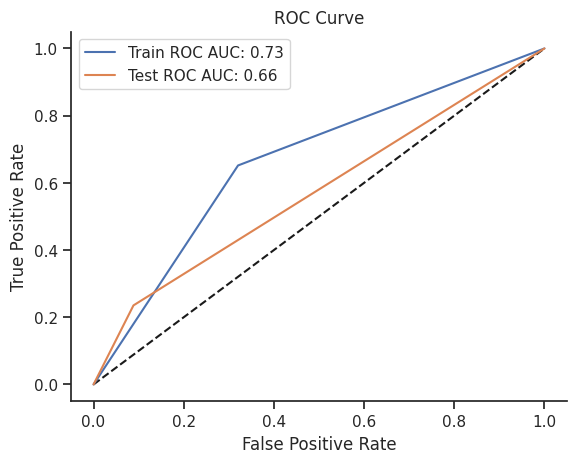

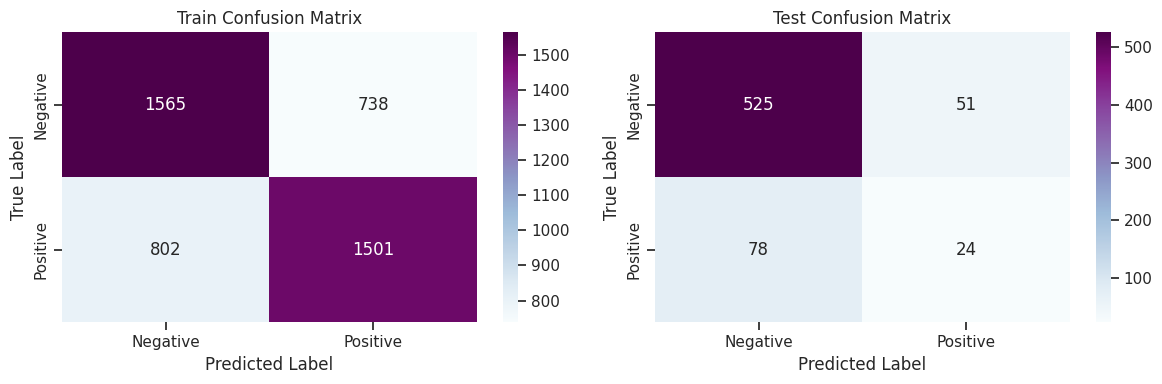


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.661174 | 0.679548 |   0.670236 | 2303        |
| 1            |    0.670389 | 0.651759 |   0.660942 | 2303        |
| accuracy     |    0.665653 | 0.665653 |   0.665653 |    0.665653 |
| macro avg    |    0.665782 | 0.665653 |   0.665589 | 4606        |
| weighted avg |    0.665782 | 0.665653 |   0.665589 | 4606        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.870647 | 0.911458 |   0.890585 | 576        |
| 1            |    0.32     | 0.235294 |   0.271186 | 102        |
| accuracy     |    0.809735 | 0.809735 |   0.809735 |   0.809735 |
| macro avg    |    0.595323 | 0.573376 |   0.580886 | 678        |
| weighted avg |    0.787806 | 0.809735 |   0.7974

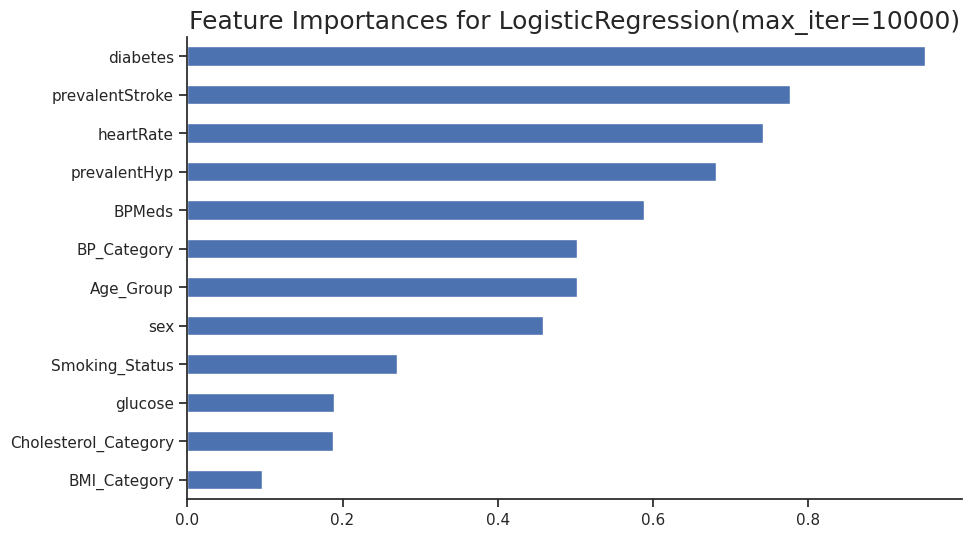

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_ros, X_test, y_ros, Y_test)

In [ ]:
score['Logistic regression'] = lr_score
score

Logistic regression
Recall Train               0.665653
Recall Test                0.809735
Accuracy Train             0.665653
Accuracy Test              0.809735

###**2. Decision Tree**

In [ ]:
# ML Model - 2 Implementation
dt = DecisionTreeClassifier(random_state=20)


Train ROC AUC: 0.9967433782023448
Test ROC AUC: 0.502859477124183


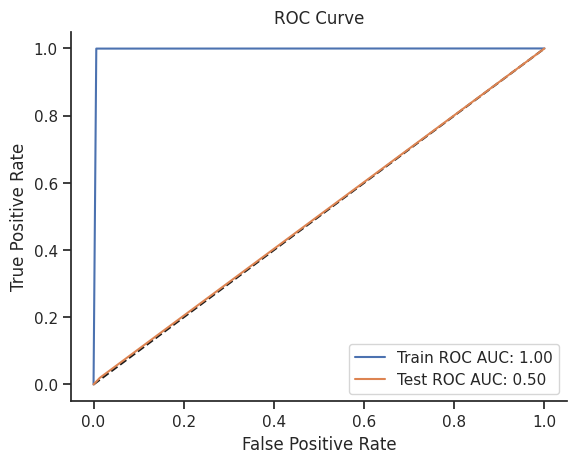

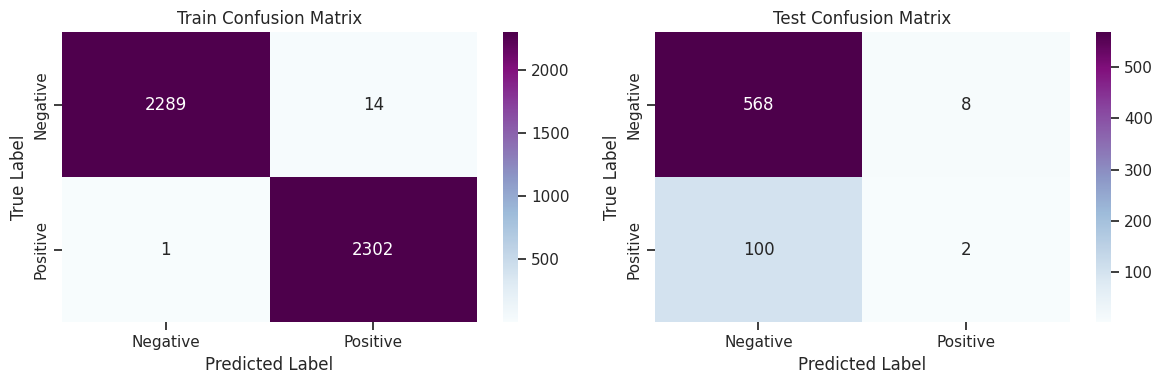


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.999563 | 0.993921 |   0.996734 | 2303        |
| 1            |    0.993955 | 0.999566 |   0.996753 | 2303        |
| accuracy     |    0.996743 | 0.996743 |   0.996743 |    0.996743 |
| macro avg    |    0.996759 | 0.996743 |   0.996743 | 4606        |
| weighted avg |    0.996759 | 0.996743 |   0.996743 | 4606        |

Test Classification Report:
|              |   precision |    recall |   f1-score |    support |
|:-------------|------------:|----------:|-----------:|-----------:|
| 0            |    0.850299 | 0.986111  |  0.913183  | 576        |
| 1            |    0.2      | 0.0196078 |  0.0357143 | 102        |
| accuracy     |    0.840708 | 0.840708  |  0.840708  |   0.840708 |
| macro avg    |    0.52515  | 0.502859  |  0.474449  | 678        |
| weighted avg |    0.752467 | 0.840708  |  

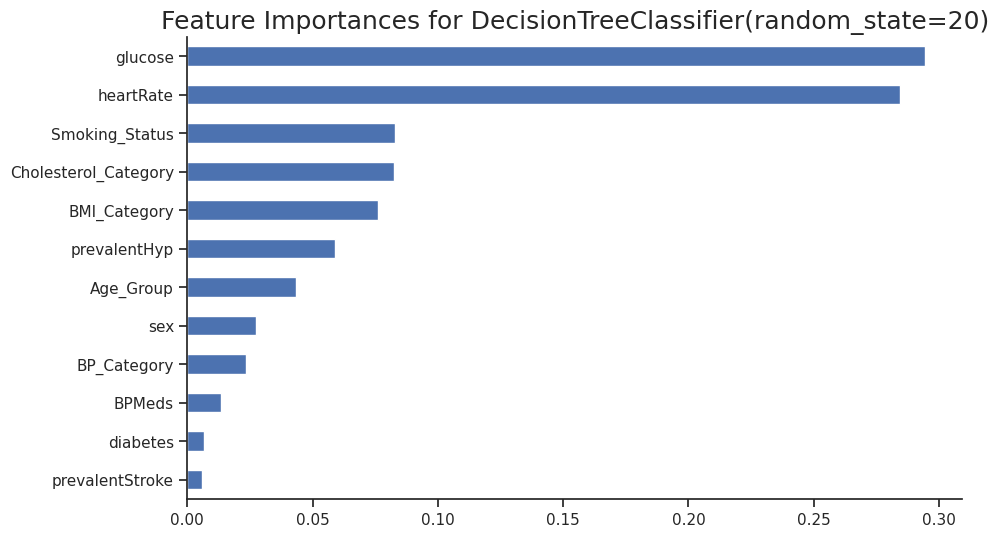

In [ ]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt, x_ros, X_test, y_ros, Y_test)

In [ ]:
score['Decision Tree'] = dt_score
score

Logistic regression  Decision Tree
Recall Train               0.665653       0.996743
Recall Test                0.809735       0.840708
Accuracy Train             0.665653       0.996743
Accuracy Test              0.809735       0.840708

###**3.XGBoost**

In [ ]:
# Initialize the model
xgb_model = XGBClassifier()


Train ROC AUC: 0.9639600521059488
Test ROC AUC: 0.5


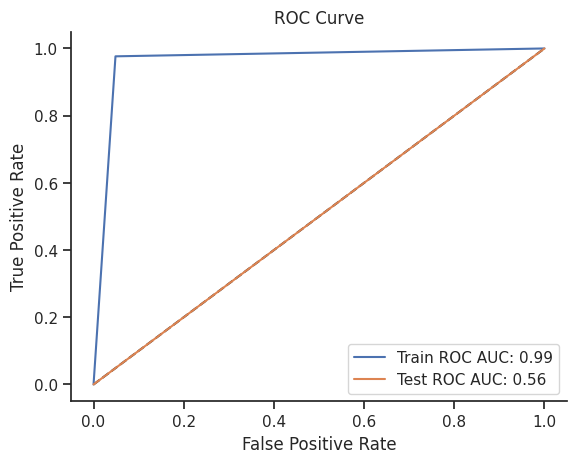

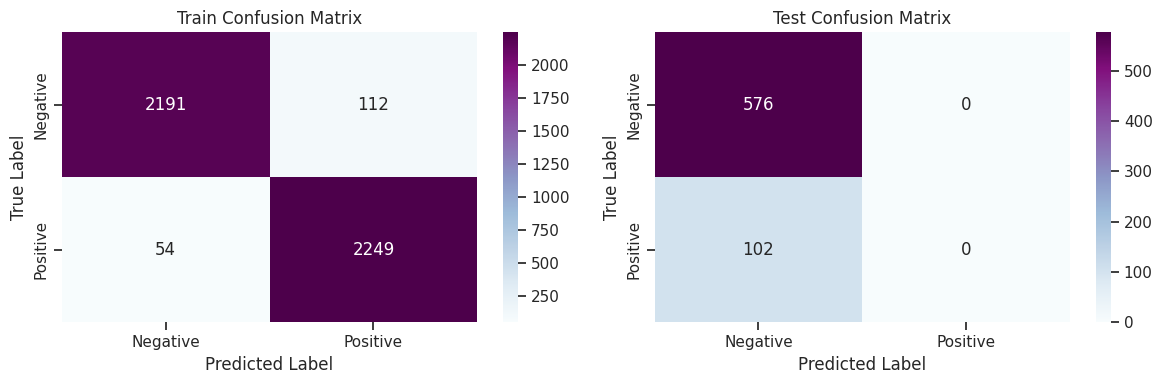


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.975947 | 0.951368 |   0.9635   | 2303       |
| 1            |    0.952562 | 0.976552 |   0.964408 | 2303       |
| accuracy     |    0.96396  | 0.96396  |   0.96396  |    0.96396 |
| macro avg    |    0.964255 | 0.96396  |   0.963954 | 4606       |
| weighted avg |    0.964255 | 0.96396  |   0.963954 | 4606       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.849558 | 1        |   0.91866  | 576        |
| 1            |    0        | 0        |   0        | 102        |
| accuracy     |    0.849558 | 0.849558 |   0.849558 |   0.849558 |
| macro avg    |    0.424779 | 0.5      |   0.45933  | 678        |
| weighted avg |    0.721748 | 0.849558 |   0.780455 | 67

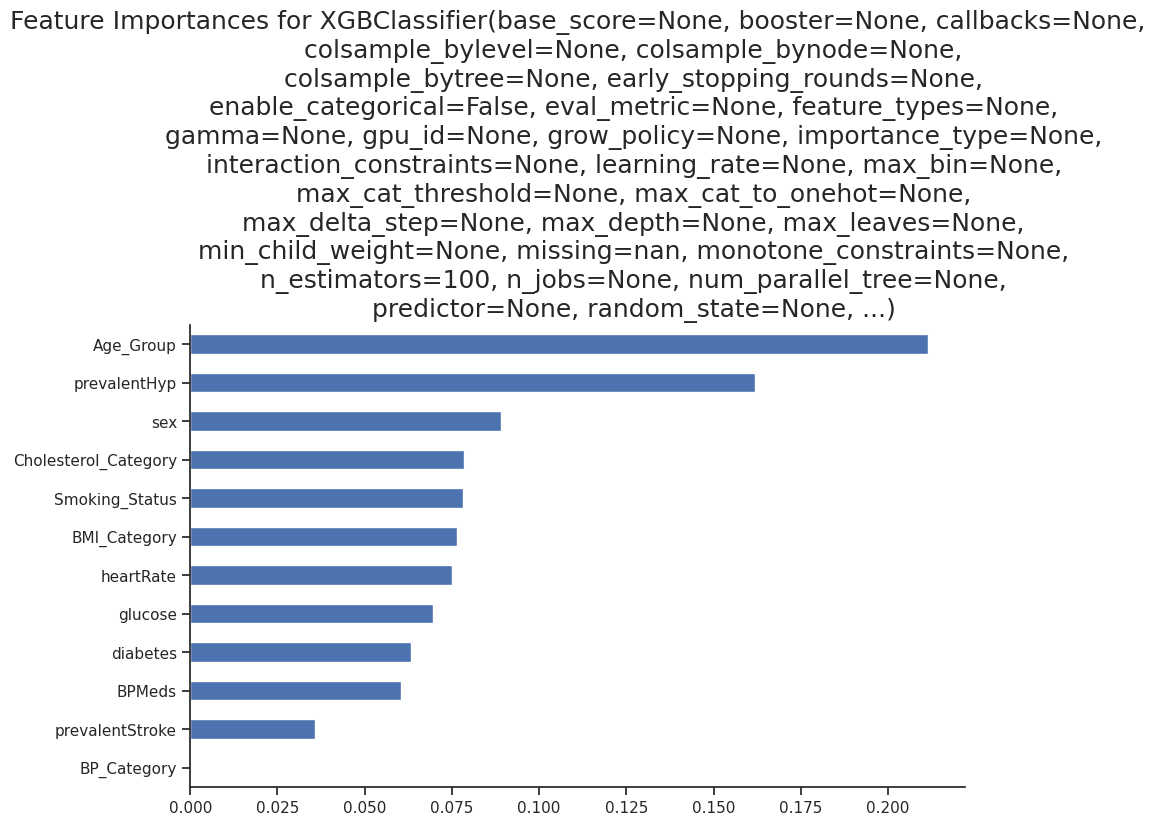

In [ ]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model,x_ros, X_test, y_ros, Y_test)

In [ ]:
score['XGB'] = xgb_score
score

Logistic regression  Decision Tree       XGB
Recall Train               0.665653       0.996743  0.963960
Recall Test                0.809735       0.840708  0.849558
Accuracy Train             0.665653       0.996743  0.963960
Accuracy Test              0.809735       0.840708  0.849558

###4. **K-Nearest Neighbors**

In [ ]:
knn_model = KNeighborsClassifier()



Train ROC AUC: 0.8840642640034737
Test ROC AUC: 0.5198631535947713


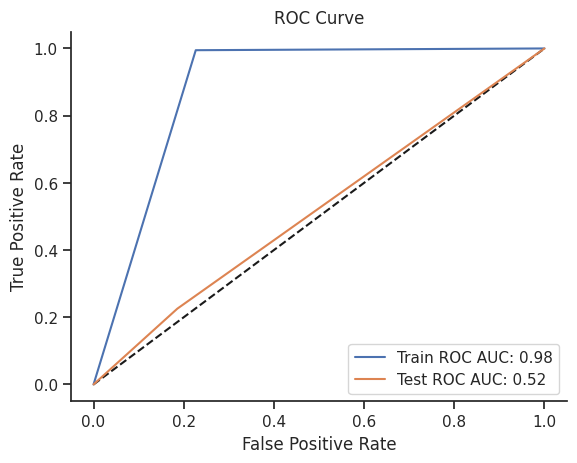

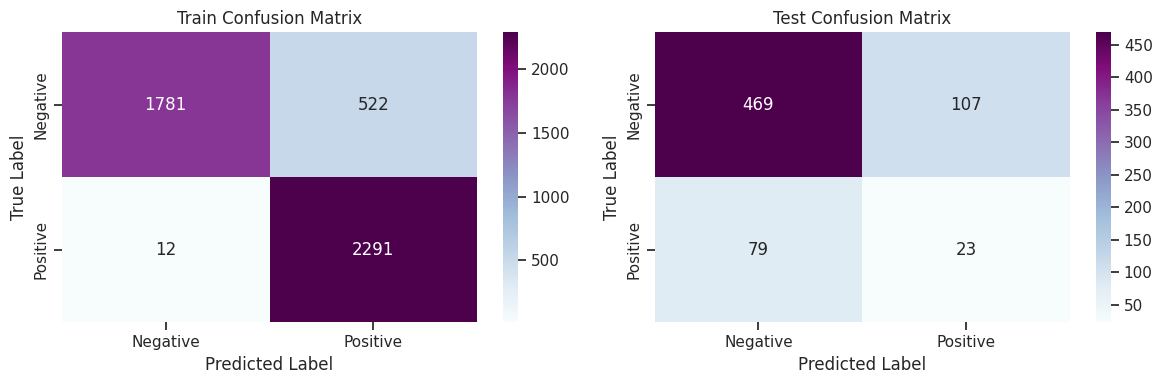


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.993307 | 0.773339 |   0.869629 | 2303        |
| 1            |    0.814433 | 0.994789 |   0.895622 | 2303        |
| accuracy     |    0.884064 | 0.884064 |   0.884064 |    0.884064 |
| macro avg    |    0.90387  | 0.884064 |   0.882625 | 4606        |
| weighted avg |    0.90387  | 0.884064 |   0.882625 | 4606        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.855839 | 0.814236 |   0.83452  | 576        |
| 1            |    0.176923 | 0.22549  |   0.198276 | 102        |
| accuracy     |    0.725664 | 0.725664 |   0.725664 |   0.725664 |
| macro avg    |    0.516381 | 0.519863 |   0.516398 | 678        |
| weighted avg |    0.753702 | 0.725664 |   0.7388

In [ ]:
# Visualizing evaluation Metric Score chart
knn_score = evaluate_model(knn_model,x_ros, X_test, y_ros, Y_test)

In [ ]:
score['KNN'] = knn_score
score

Logistic regression  Decision Tree       XGB       KNN
Recall Train               0.665653       0.996743  0.963960  0.884064
Recall Test                0.809735       0.840708  0.849558  0.725664
Accuracy Train             0.665653       0.996743  0.963960  0.884064
Accuracy Test              0.809735       0.840708  0.849558  0.725664

### **5.Support Vector Machine**

In [ ]:
# Initialize the model
svm = SVC(kernel='linear', random_state=0, probability=True)


Train ROC AUC: 0.6584889274858878
Test ROC AUC: 0.616421568627451


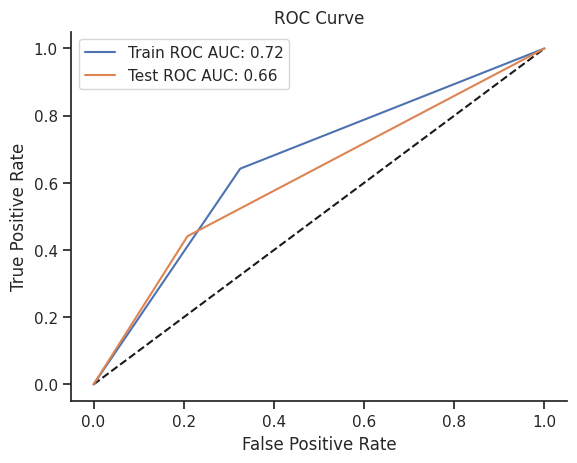

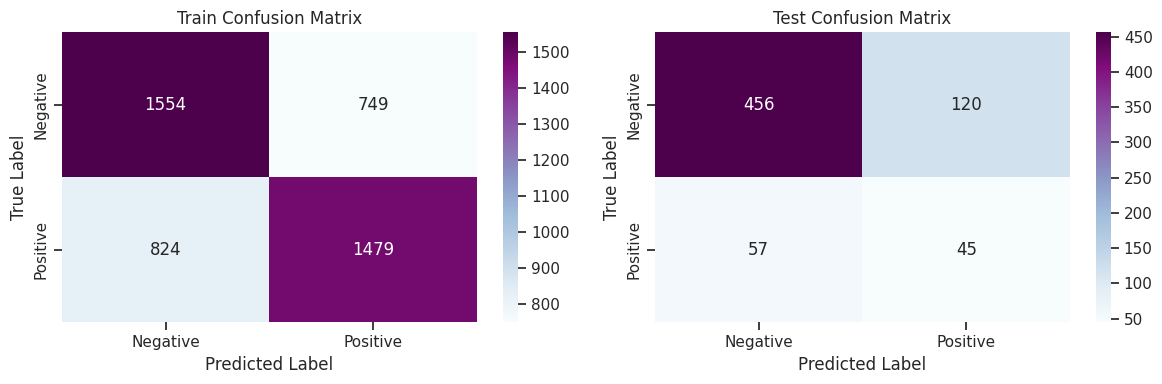


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.65349  | 0.674772 |   0.663961 | 2303        |
| 1            |    0.663824 | 0.642206 |   0.652836 | 2303        |
| accuracy     |    0.658489 | 0.658489 |   0.658489 |    0.658489 |
| macro avg    |    0.658657 | 0.658489 |   0.658398 | 4606        |
| weighted avg |    0.658657 | 0.658489 |   0.658398 | 4606        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.888889 | 0.791667 |   0.837466 | 576        |
| 1            |    0.272727 | 0.441176 |   0.337079 | 102        |
| accuracy     |    0.738938 | 0.738938 |   0.738938 |   0.738938 |
| macro avg    |    0.580808 | 0.616422 |   0.587272 | 678        |
| weighted avg |    0.796192 | 0.738938 |   0.7621

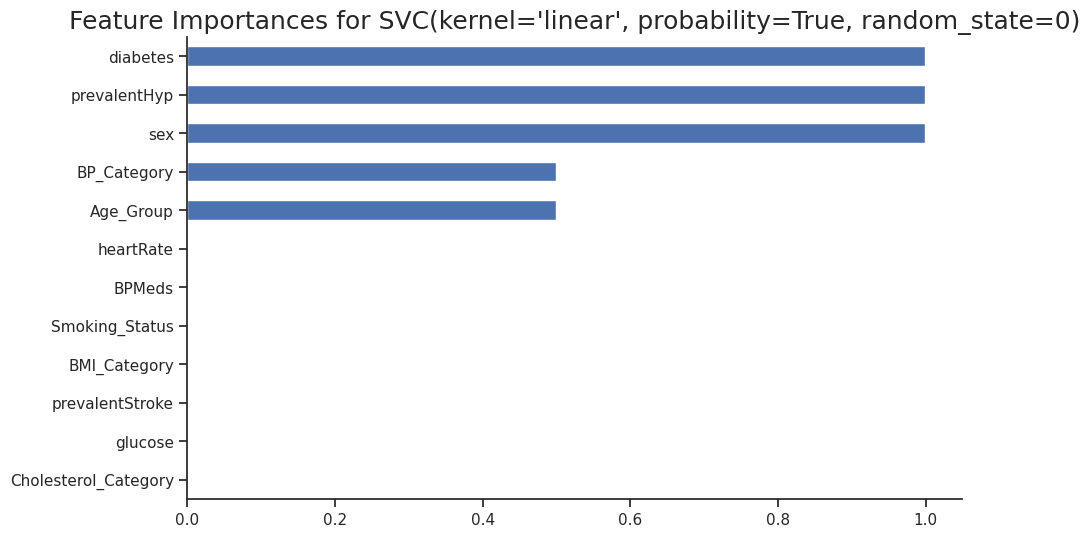

In [ ]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm, x_ros, X_test, y_ros, Y_test)

In [ ]:
score['SVM'] = svm_score
score

Logistic regression  Decision Tree       XGB       KNN  \
Recall Train               0.665653       0.996743  0.963960  0.884064   
Recall Test                0.809735       0.840708  0.849558  0.725664   
Accuracy Train             0.665653       0.996743  0.963960  0.884064   
Accuracy Test              0.809735       0.840708  0.849558  0.725664   

                     SVM  
Recall Train    0.658489  
Recall Test     0.738938  
Accuracy Train  0.658489  
Accuracy Test   0.738938

###**6.Random Forest**

In [ ]:
# Initialize the model
rf = RandomForestClassifier(random_state=0)


Train ROC AUC: 0.9967433782023448
Test ROC AUC: 0.5


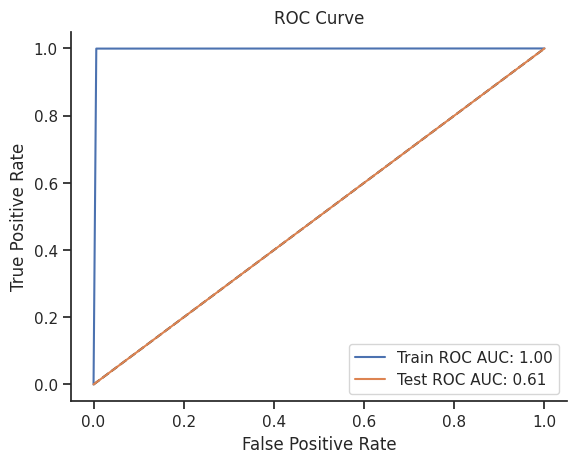

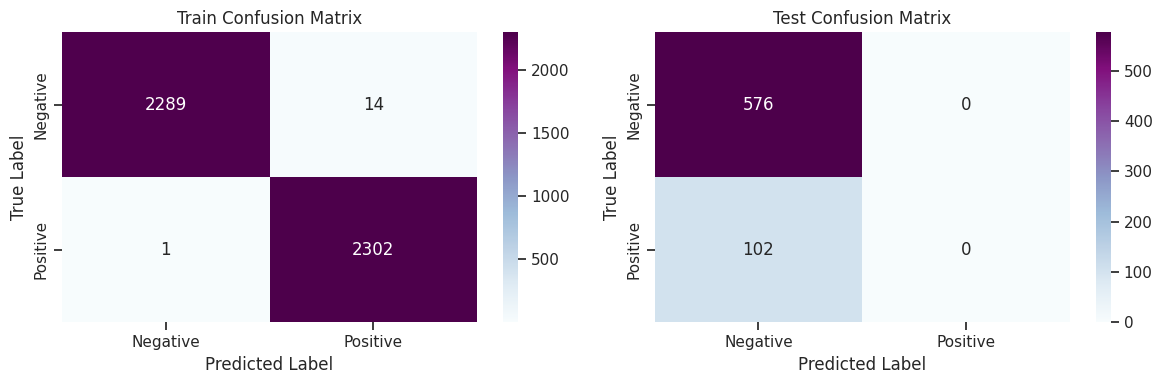


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.999563 | 0.993921 |   0.996734 | 2303        |
| 1            |    0.993955 | 0.999566 |   0.996753 | 2303        |
| accuracy     |    0.996743 | 0.996743 |   0.996743 |    0.996743 |
| macro avg    |    0.996759 | 0.996743 |   0.996743 | 4606        |
| weighted avg |    0.996759 | 0.996743 |   0.996743 | 4606        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.849558 | 1        |   0.91866  | 576        |
| 1            |    0        | 0        |   0        | 102        |
| accuracy     |    0.849558 | 0.849558 |   0.849558 |   0.849558 |
| macro avg    |    0.424779 | 0.5      |   0.45933  | 678        |
| weighted avg |    0.721748 | 0.849558 |   0.7804

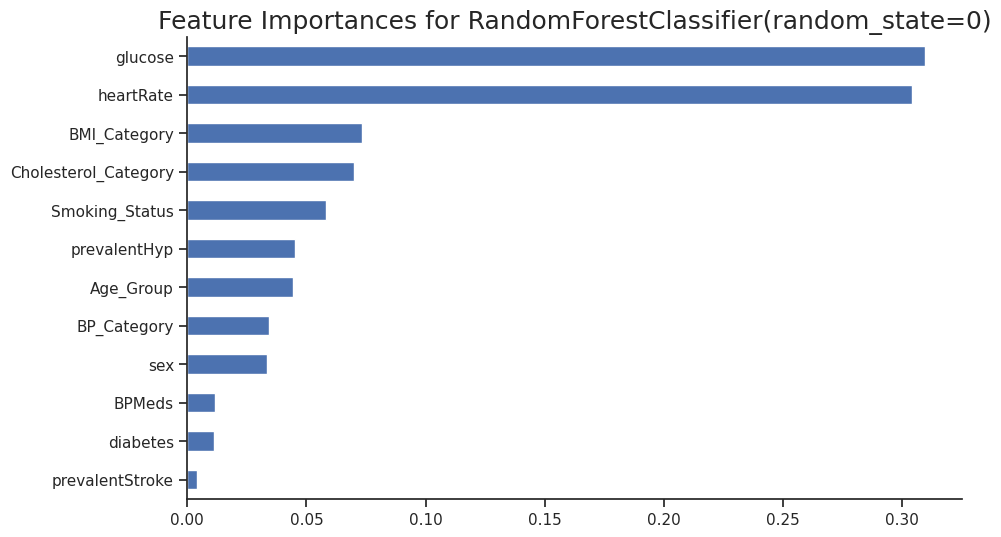

In [ ]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf, x_ros, X_test, y_ros, Y_test)

In [ ]:
score['Random Forest'] = rf_score
score

Logistic regression  Decision Tree       XGB       KNN  \
Recall Train               0.665653       0.996743  0.963960  0.884064   
Recall Test                0.809735       0.840708  0.849558  0.725664   
Accuracy Train             0.665653       0.996743  0.963960  0.884064   
Accuracy Test              0.809735       0.840708  0.849558  0.725664   

                     SVM  Random Forest  
Recall Train    0.658489       0.996743  
Recall Test     0.738938       0.849558  
Accuracy Train  0.658489       0.996743  
Accuracy Test   0.738938       0.849558

###**7.Neural Network**

In [ ]:
# Initiate model
neural = MLPClassifier(random_state=0)


Train ROC AUC: 0.7006079027355623
Test ROC AUC: 0.5001021241830066


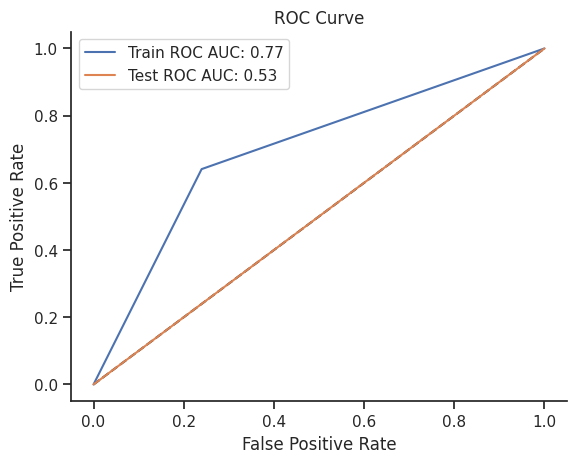

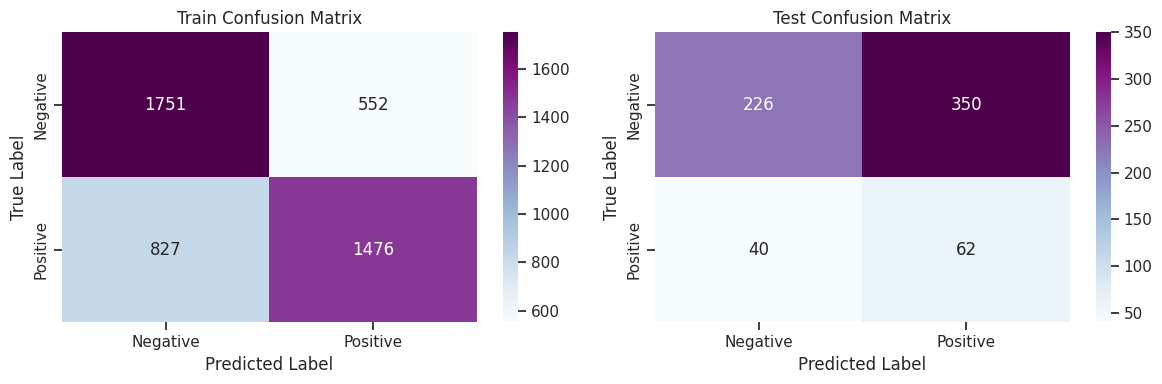


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.679209 | 0.760313 |   0.717476 | 2303        |
| 1            |    0.727811 | 0.640903 |   0.681598 | 2303        |
| accuracy     |    0.700608 | 0.700608 |   0.700608 |    0.700608 |
| macro avg    |    0.70351  | 0.700608 |   0.699537 | 4606        |
| weighted avg |    0.70351  | 0.700608 |   0.699537 | 4606        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.849624 | 0.392361 |   0.536817 | 576        |
| 1            |    0.150485 | 0.607843 |   0.241245 | 102        |
| accuracy     |    0.424779 | 0.424779 |   0.424779 |   0.424779 |
| macro avg    |    0.500055 | 0.500102 |   0.389031 | 678        |
| weighted avg |    0.744444 | 0.424779 |   0.4923

In [ ]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(neural, x_ros, X_test, y_ros, Y_test)

In [ ]:
score['Neural Network'] = neural_score
score

Logistic regression  Decision Tree       XGB       KNN  \
Recall Train               0.665653       0.996743  0.963960  0.884064   
Recall Test                0.809735       0.840708  0.849558  0.725664   
Accuracy Train             0.665653       0.996743  0.963960  0.884064   
Accuracy Test              0.809735       0.840708  0.849558  0.725664   

                     SVM  Random Forest  Neural Network  
Recall Train    0.658489       0.996743        0.700608  
Recall Test     0.738938       0.849558        0.424779  
Accuracy Train  0.658489       0.996743        0.700608  
Accuracy Test   0.738938       0.849558        0.424779

In [ ]:
print(score.to_markdown())

|                |   Logistic regression |   Decision Tree |      XGB |      KNN |      SVM |   Random Forest |   Neural Network |
|:---------------|----------------------:|----------------:|---------:|---------:|---------:|----------------:|-----------------:|
| Recall Train   |              0.665653 |        0.996743 | 0.96396  | 0.884064 | 0.658489 |        0.996743 |         0.700608 |
| Recall Test    |              0.809735 |        0.840708 | 0.849558 | 0.725664 | 0.738938 |        0.849558 |         0.424779 |
| Accuracy Train |              0.665653 |        0.996743 | 0.96396  | 0.884064 | 0.658489 |        0.996743 |         0.700608 |
| Accuracy Test  |              0.809735 |        0.840708 | 0.849558 | 0.725664 | 0.738938 |        0.849558 |         0.424779 |


## **7.Plot of scores for models**

### Recall

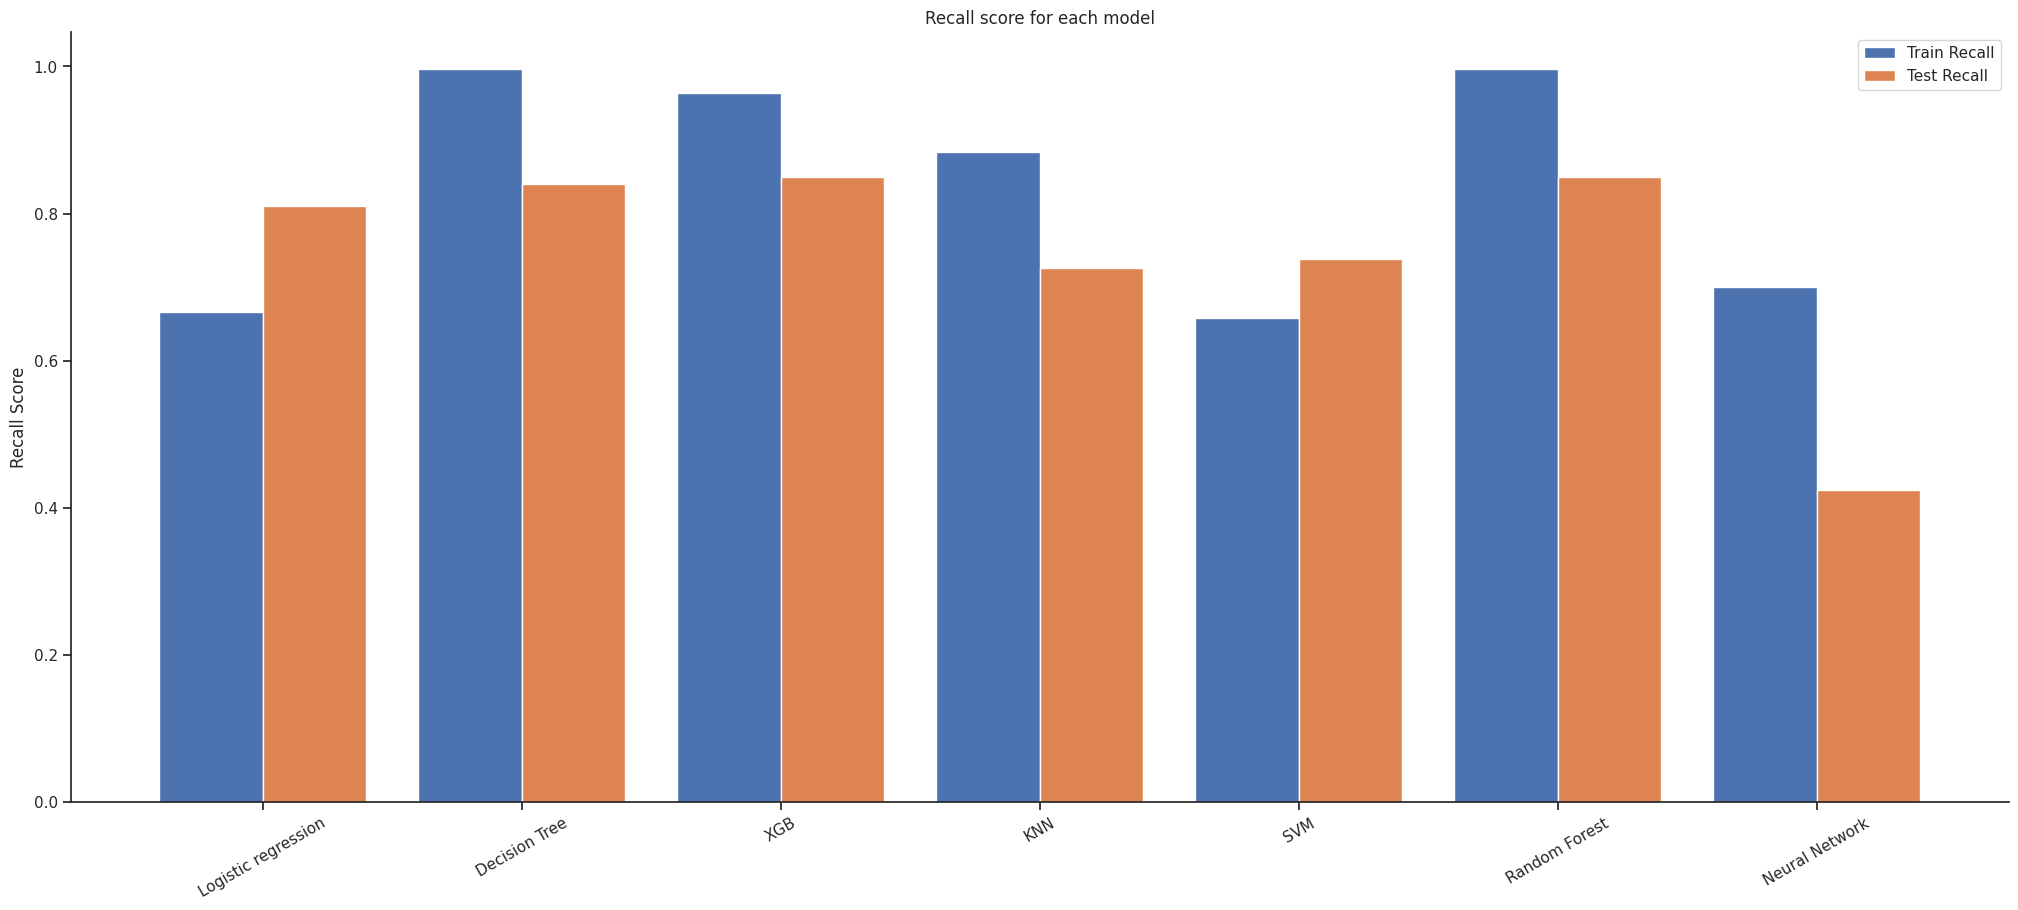

In [ ]:
# Recall Scores plot

models = list(score.columns)
train = score.iloc[2,:]
test = score.iloc[3,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Recall')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Recall')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Recall Score")
plt.title("Recall score for each model")
plt.legend()
plt.show()

### Accuracy

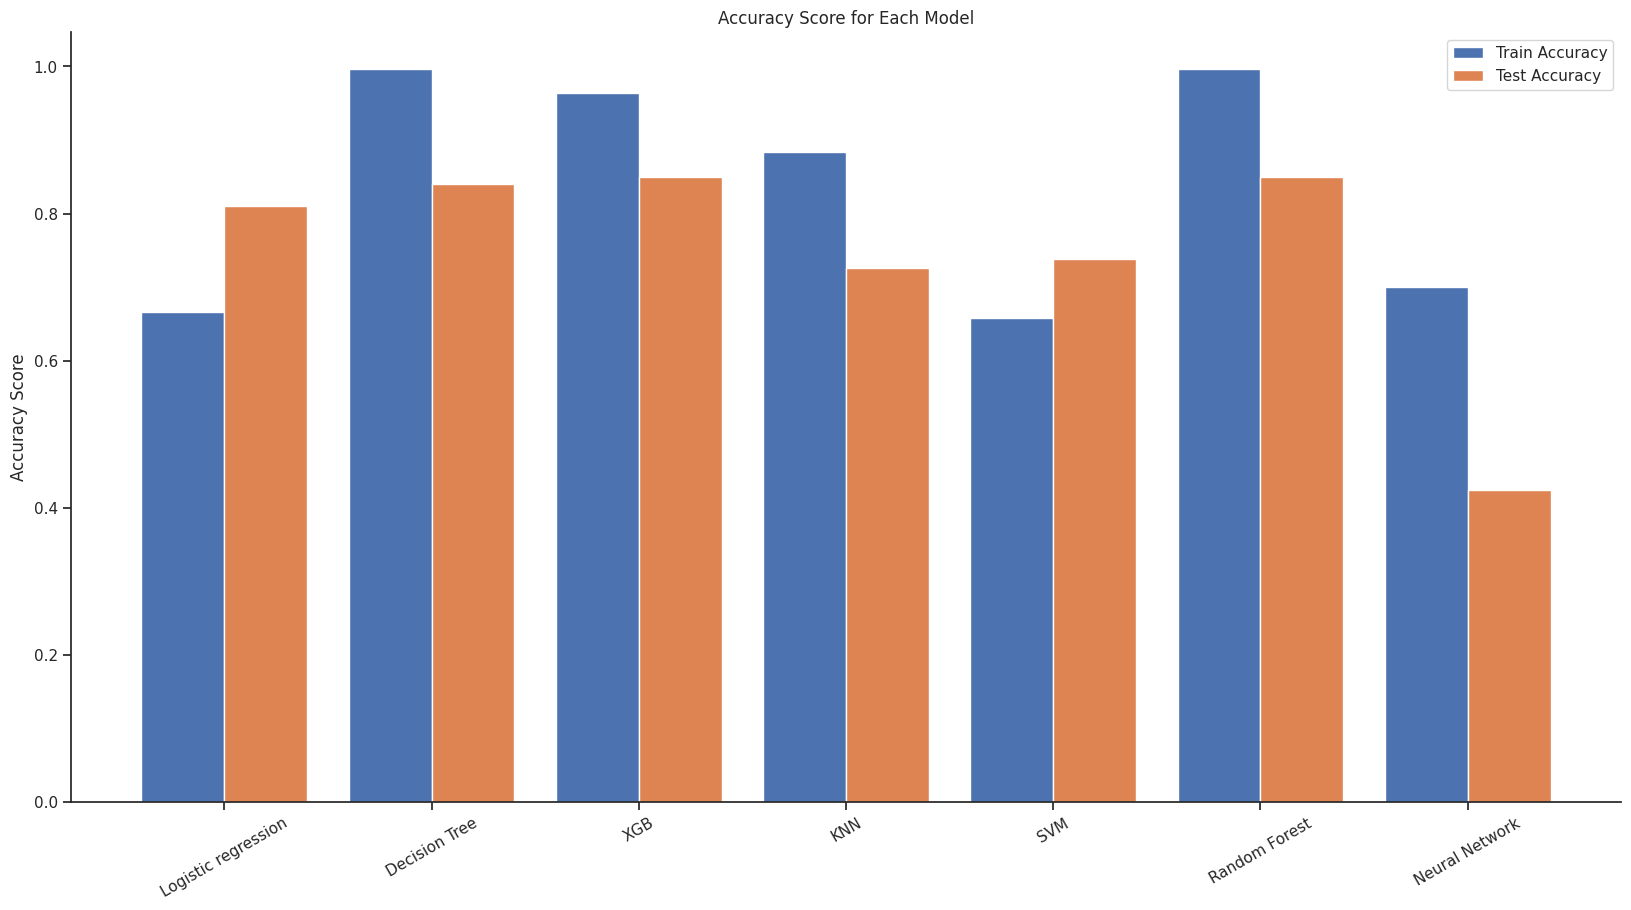

In [ ]:
#Accuracy of each column
models = list(score.columns)
train = score.loc['Accuracy Train', :]
test = score.loc['Accuracy Test', :]

X_axis = np.arange(len(models))

plt.figure(figsize=(20, 10))
plt.bar(X_axis - 0.2, train, 0.4, label='Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.4, label='Test Accuracy')

plt.xticks(X_axis, models, rotation=30)
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for Each Model")
plt.legend()
plt.show()


On comparing these models on the basis of accuracy and recall , we found that best 5 models are : Decision tree, XGB, KNN, Random Forest , Neural Network. Let's hyperparameter tune these models

##**8.Hyperparametric tunning**

### **1.Hypertunning Decision Tree**

In [ ]:
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_ros, y_ros)

# Select the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 5}

In [ ]:
# Train a new model with the best hyperparameters
dt2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.7477203647416413
Test ROC AUC: 0.49489379084967317


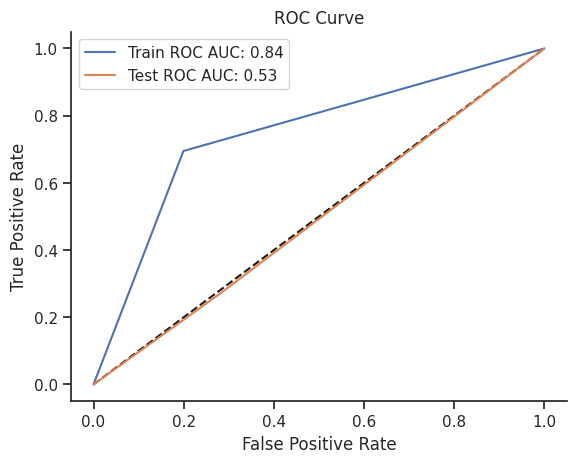

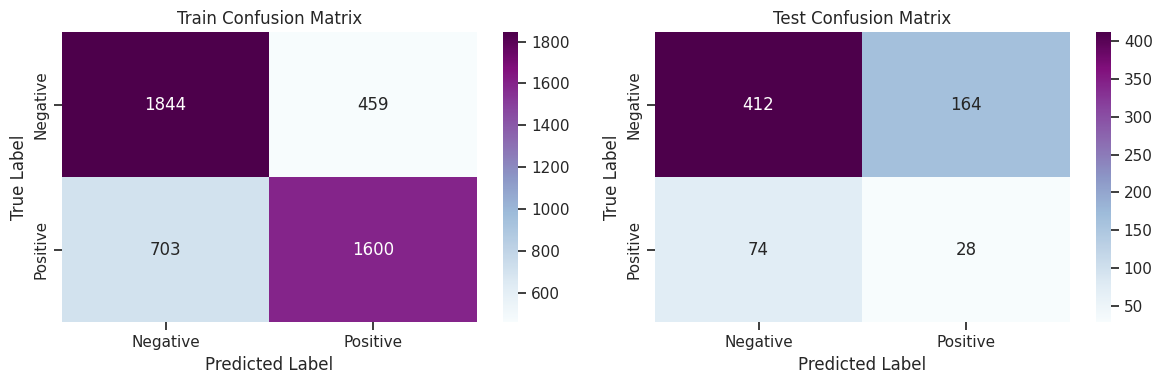


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.723989 | 0.800695 |   0.760412 | 2303       |
| 1            |    0.777076 | 0.694746 |   0.733608 | 2303       |
| accuracy     |    0.74772  | 0.74772  |   0.74772  |    0.74772 |
| macro avg    |    0.750533 | 0.74772  |   0.74701  | 4606       |
| weighted avg |    0.750533 | 0.74772  |   0.74701  | 4606       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.847737 | 0.715278 |   0.775895 | 576        |
| 1            |    0.145833 | 0.27451  |   0.190476 | 102        |
| accuracy     |    0.648968 | 0.648968 |   0.648968 |   0.648968 |
| macro avg    |    0.496785 | 0.494894 |   0.483185 | 678        |
| weighted avg |    0.742141 | 0.648968 |   0.687823 | 67

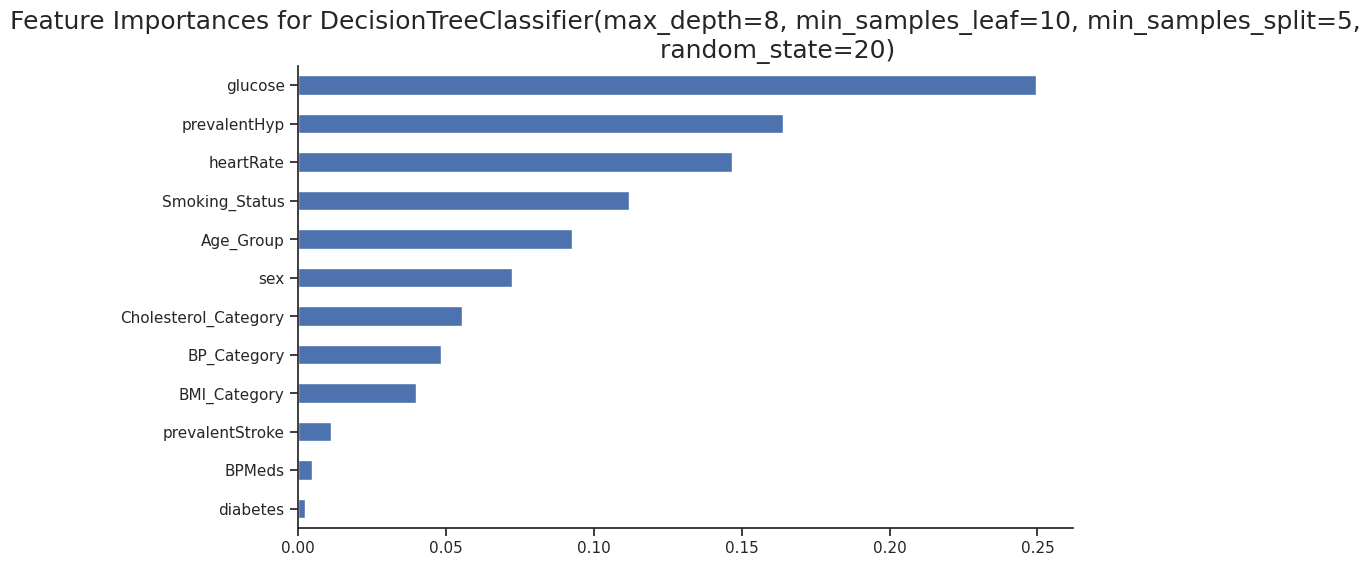

In [ ]:
dt2_score = evaluate_model(dt2, x_ros, X_test, y_ros, Y_test)

In [ ]:
score['Decision Tree tuned'] = dt2_score
score

Logistic regression  Decision Tree       XGB       KNN  \
Recall Train               0.665653       0.996743  0.963960  0.884064   
Recall Test                0.809735       0.840708  0.849558  0.725664   
Accuracy Train             0.665653       0.996743  0.963960  0.884064   
Accuracy Test              0.809735       0.840708  0.849558  0.725664   

                     SVM  Random Forest  Neural Network  Decision Tree tuned  
Recall Train    0.658489       0.996743        0.700608             0.747720  
Recall Test     0.738938       0.849558        0.424779             0.648968  
Accuracy Train  0.658489       0.996743        0.700608             0.747720  
Accuracy Test   0.738938       0.849558        0.424779             0.648968

###**2.Hyperparameter tunning XGB**

In [ ]:
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2_model = XGBClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2_model, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_ros, y_ros)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'n_estimators': 130, 'max_depth': 13, 'learning_rate': 0.24000000000000002}

In [ ]:
# Initialize model with best parameters
xgb2_model = XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Train ROC AUC: 0.9967433782023448
Test ROC AUC: 0.5040339052287581


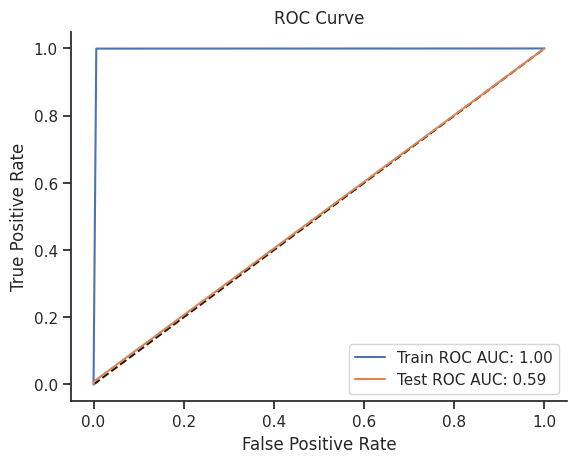

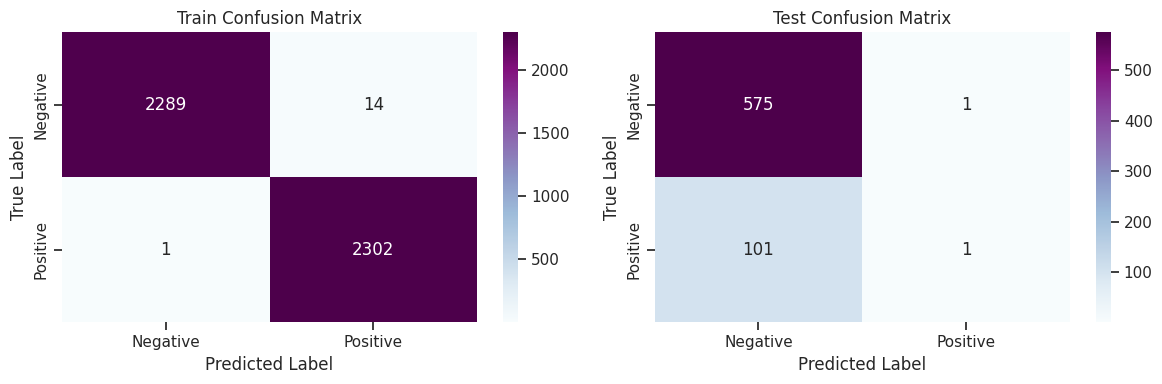


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.999563 | 0.993921 |   0.996734 | 2303        |
| 1            |    0.993955 | 0.999566 |   0.996753 | 2303        |
| accuracy     |    0.996743 | 0.996743 |   0.996743 |    0.996743 |
| macro avg    |    0.996759 | 0.996743 |   0.996743 | 4606        |
| weighted avg |    0.996759 | 0.996743 |   0.996743 | 4606        |

Test Classification Report:
|              |   precision |     recall |   f1-score |    support |
|:-------------|------------:|-----------:|-----------:|-----------:|
| 0            |    0.850592 | 0.998264   |  0.91853   | 576        |
| 1            |    0.5      | 0.00980392 |  0.0192308 | 102        |
| accuracy     |    0.849558 | 0.849558   |  0.849558  |   0.849558 |
| macro avg    |    0.675296 | 0.504034   |  0.468881  | 678        |
| weighted avg |    0.797848 | 0.84955

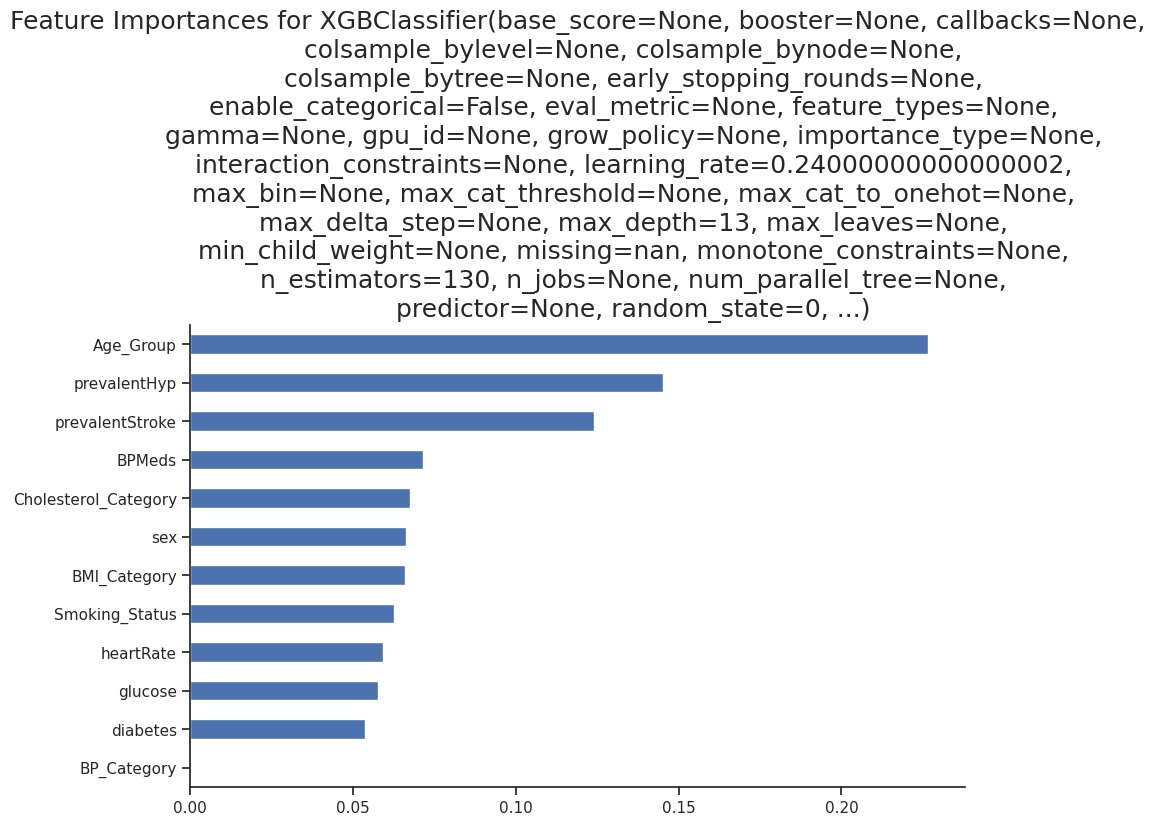

In [ ]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb2_model, x_ros, X_test, y_ros, Y_test)

In [ ]:
score['XGB tuned'] = xgb2_score
score

Logistic regression  Decision Tree       XGB       KNN  \
Recall Train               0.665653       0.996743  0.963960  0.884064   
Recall Test                0.809735       0.840708  0.849558  0.725664   
Accuracy Train             0.665653       0.996743  0.963960  0.884064   
Accuracy Test              0.809735       0.840708  0.849558  0.725664   

                     SVM  Random Forest  Neural Network  Decision Tree tuned  \
Recall Train    0.658489       0.996743        0.700608             0.747720   
Recall Test     0.738938       0.849558        0.424779             0.648968   
Accuracy Train  0.658489       0.996743        0.700608             0.747720   
Accuracy Test   0.738938       0.849558        0.424779             0.648968   

                XGB tuned  
Recall Train     0.996743  
Recall Test      0.849558  
Accuracy Train   0.996743  
Accuracy Test    0.849558

### **3.Hypertunning K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the KNN model
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=5)
grid_search.fit(X_test, Y_test)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Initialize KNN model with best parameters
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                weights=grid_search.best_params_['weights'],
                                p=grid_search.best_params_['p'])

# Fit the KNN model on the test dataset
best_knn.fit(X_test, Y_test)

# Make predictions on the test dataset
pred = best_knn.predict(X_test)

Best Parameters:  {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best Score:  0.19990931890726693


In [ ]:
# Initialize model with best parameters
knn2 = KNeighborsClassifier(n_neighbors=best_knn.n_neighbors,
                           weights=best_knn.weights,
                           p=best_knn.p)

# Fit the KNN model on the test dataset
knn2.fit(X_test, Y_test)

# Make predictions on the test dataset
pred = knn2.predict(X_test)


Train ROC AUC: 0.9947894051237517
Test ROC AUC: 0.5246119281045751


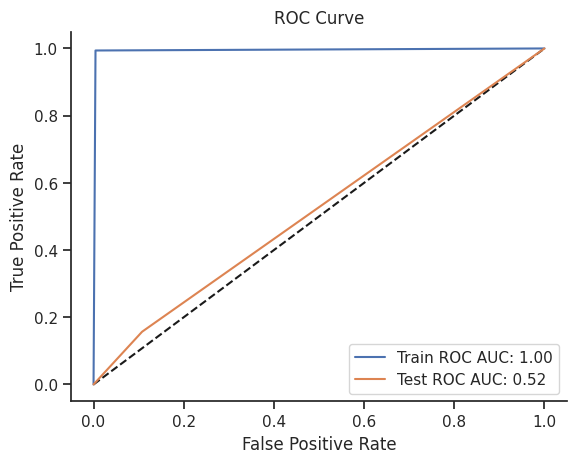

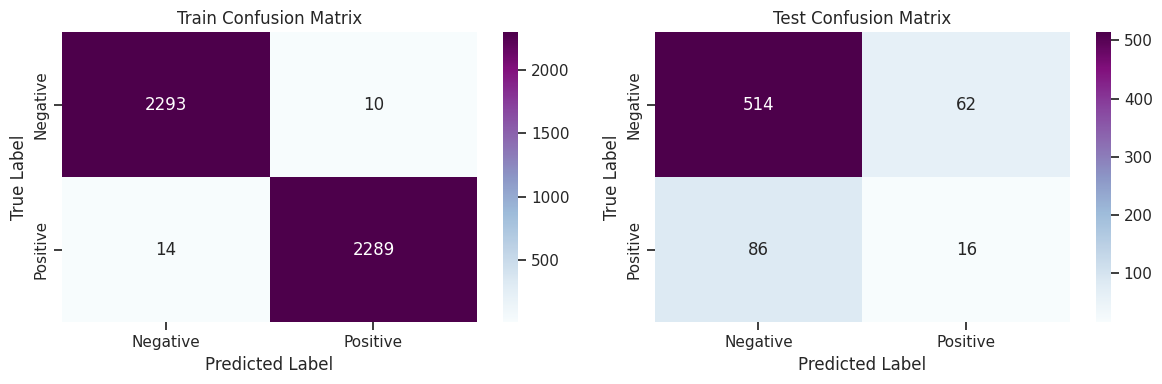


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.993932 | 0.995658 |   0.994794 | 2303        |
| 1            |    0.99565  | 0.993921 |   0.994785 | 2303        |
| accuracy     |    0.994789 | 0.994789 |   0.994789 |    0.994789 |
| macro avg    |    0.994791 | 0.994789 |   0.994789 | 4606        |
| weighted avg |    0.994791 | 0.994789 |   0.994789 | 4606        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.856667 | 0.892361 |   0.87415  | 576        |
| 1            |    0.205128 | 0.156863 |   0.177778 | 102        |
| accuracy     |    0.781711 | 0.781711 |   0.781711 |   0.781711 |
| macro avg    |    0.530897 | 0.524612 |   0.525964 | 678        |
| weighted avg |    0.758648 | 0.781711 |   0.7693

In [ ]:
# Visualizing evaluation Metric Score chart
knn2_score = evaluate_model(knn2, x_ros, X_test, y_ros, Y_test)

In [ ]:
score['KNeighbors tuned'] = knn2_score
score

Logistic regression  Decision Tree       XGB       KNN  \
Recall Train               0.665653       0.996743  0.963960  0.884064   
Recall Test                0.809735       0.840708  0.849558  0.725664   
Accuracy Train             0.665653       0.996743  0.963960  0.884064   
Accuracy Test              0.809735       0.840708  0.849558  0.725664   

                     SVM  Random Forest  Neural Network  Decision Tree tuned  \
Recall Train    0.658489       0.996743        0.700608             0.747720   
Recall Test     0.738938       0.849558        0.424779             0.648968   
Accuracy Train  0.658489       0.996743        0.700608             0.747720   
Accuracy Test   0.738938       0.849558        0.424779             0.648968   

                XGB tuned  KNeighbors tuned  
Recall Train     0.996743          0.994789  
Recall Test      0.849558          0.781711  
Accuracy Train   0.996743          0.994789  
Accuracy Test    0.849558          0.781711

###**4.Hyperparamter tunning Random Forest**

In [ ]:
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the GridSearchCV to the training data
random_search.fit(x_ros, y_ros)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 14}

In [ ]:
# Initialize model with best parameters
rf2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.9496309161962656
Test ROC AUC: 0.5071997549019608


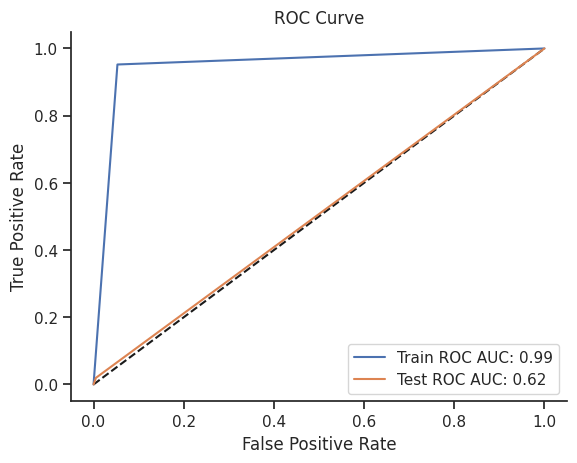

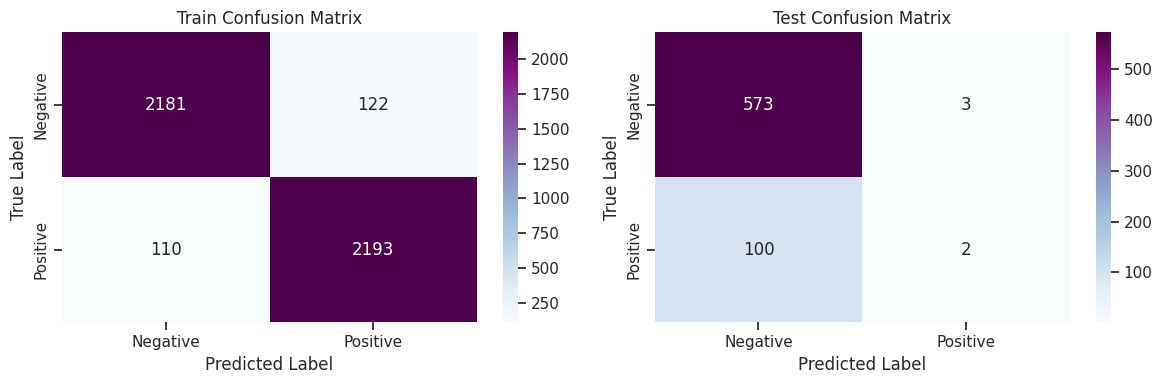


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.951986 | 0.947026 |   0.949499 | 2303        |
| 1            |    0.9473   | 0.952236 |   0.949762 | 2303        |
| accuracy     |    0.949631 | 0.949631 |   0.949631 |    0.949631 |
| macro avg    |    0.949643 | 0.949631 |   0.949631 | 4606        |
| weighted avg |    0.949643 | 0.949631 |   0.949631 | 4606        |

Test Classification Report:
|              |   precision |    recall |   f1-score |    support |
|:-------------|------------:|----------:|-----------:|-----------:|
| 0            |    0.851412 | 0.994792  |  0.917534  | 576        |
| 1            |    0.4      | 0.0196078 |  0.0373832 | 102        |
| accuracy     |    0.848083 | 0.848083  |  0.848083  |   0.848083 |
| macro avg    |    0.625706 | 0.5072    |  0.477459  | 678        |
| weighted avg |    0.7835   | 0.848083  |  

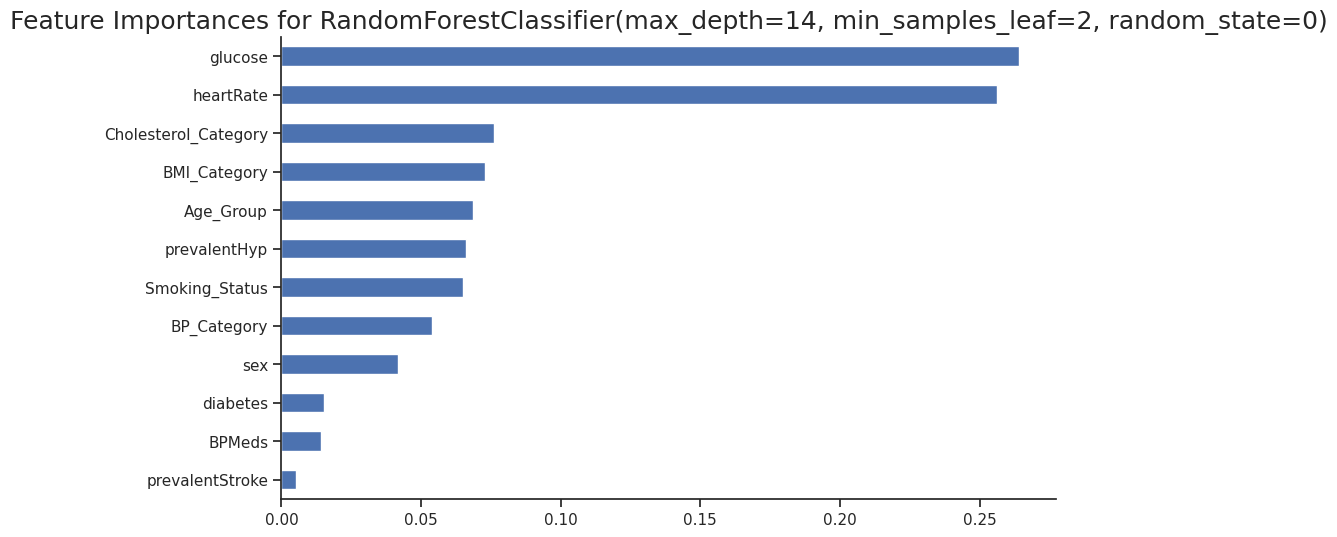

In [ ]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf2, x_ros, X_test, y_ros, Y_test)

In [ ]:
score['Random Forest tuned'] = rf2_score

In [ ]:
score

Logistic regression  Decision Tree       XGB       KNN  \
Recall Train               0.665653       0.996743  0.963960  0.884064   
Recall Test                0.809735       0.840708  0.849558  0.725664   
Accuracy Train             0.665653       0.996743  0.963960  0.884064   
Accuracy Test              0.809735       0.840708  0.849558  0.725664   

                     SVM  Random Forest  Neural Network  Decision Tree tuned  \
Recall Train    0.658489       0.996743        0.700608             0.747720   
Recall Test     0.738938       0.849558        0.424779             0.648968   
Accuracy Train  0.658489       0.996743        0.700608             0.747720   
Accuracy Test   0.738938       0.849558        0.424779             0.648968   

                XGB tuned  KNeighbors tuned  Random Forest tuned  
Recall Train     0.996743          0.994789             0.949631  
Recall Test      0.849558          0.781711             0.848083  
Accuracy Train   0.996743          0.994789             0.949631  
Accuracy Test    0.849558          0.781711             0.848083

###**5.Hyperparameter tunning Neural Networks**

In [ ]:
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}
# Initialize the model
neural = MLPClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_ros, y_ros)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'hidden_layer_sizes': 80, 'alpha': 0.0092}

In [ ]:
# Initiate model with best parameters
neural2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Train ROC AUC: 0.6891011723838472
Test ROC AUC: 0.5527982026143791


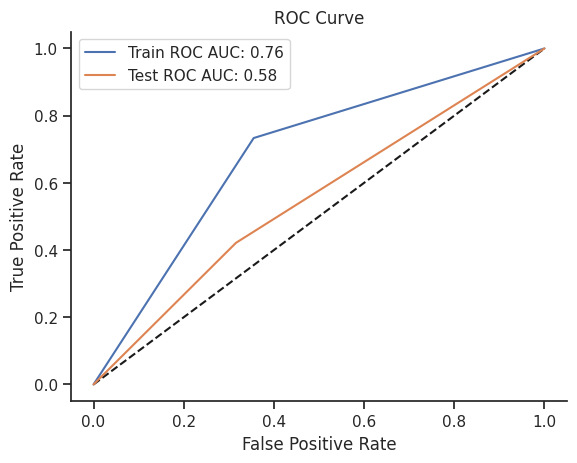

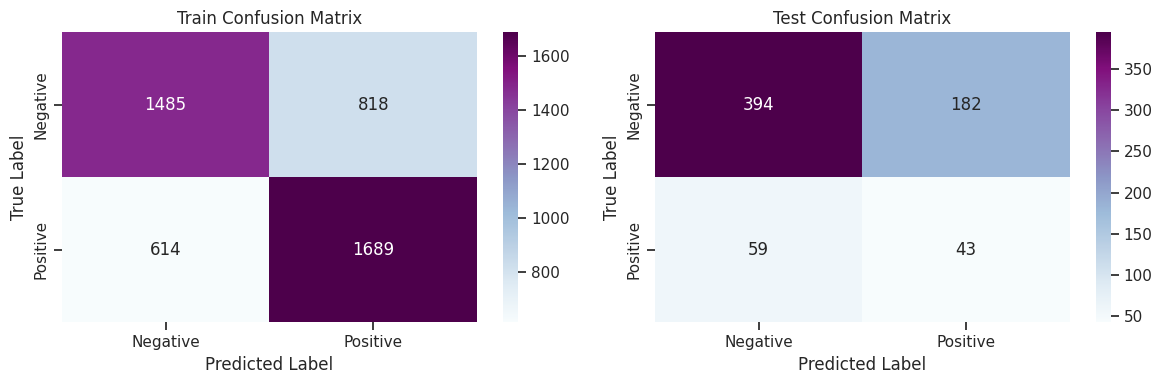


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.70748  | 0.644811 |   0.674693 | 2303        |
| 1            |    0.673714 | 0.733391 |   0.702287 | 2303        |
| accuracy     |    0.689101 | 0.689101 |   0.689101 |    0.689101 |
| macro avg    |    0.690597 | 0.689101 |   0.68849  | 4606        |
| weighted avg |    0.690597 | 0.689101 |   0.68849  | 4606        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.869757 | 0.684028 |   0.765792 | 576        |
| 1            |    0.191111 | 0.421569 |   0.262997 | 102        |
| accuracy     |    0.644543 | 0.644543 |   0.644543 |   0.644543 |
| macro avg    |    0.530434 | 0.552798 |   0.514394 | 678        |
| weighted avg |    0.76766  | 0.644543 |   0.6901

In [ ]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(neural2, x_ros, X_test, y_ros, Y_test)

In [ ]:
score['Neural Network tuned']=neural2_score

Let's again compare all models

In [ ]:
print(score.to_markdown())

|                |   Logistic regression |   Decision Tree |      XGB |      KNN |      SVM |   Random Forest |   Neural Network |   Decision Tree tuned |   XGB tuned |   KNeighbors tuned |   Random Forest tuned |   Neural Network tuned |
|:---------------|----------------------:|----------------:|---------:|---------:|---------:|----------------:|-----------------:|----------------------:|------------:|-------------------:|----------------------:|-----------------------:|
| Recall Train   |              0.665653 |        0.996743 | 0.96396  | 0.884064 | 0.658489 |        0.996743 |         0.700608 |              0.74772  |    0.996743 |           0.994789 |              0.949631 |               0.689101 |
| Recall Test    |              0.809735 |        0.840708 | 0.849558 | 0.725664 | 0.738938 |        0.849558 |         0.424779 |              0.648968 |    0.849558 |           0.781711 |              0.848083 |               0.644543 |
| Accuracy Train |              0.665653 |  

###**Recall**

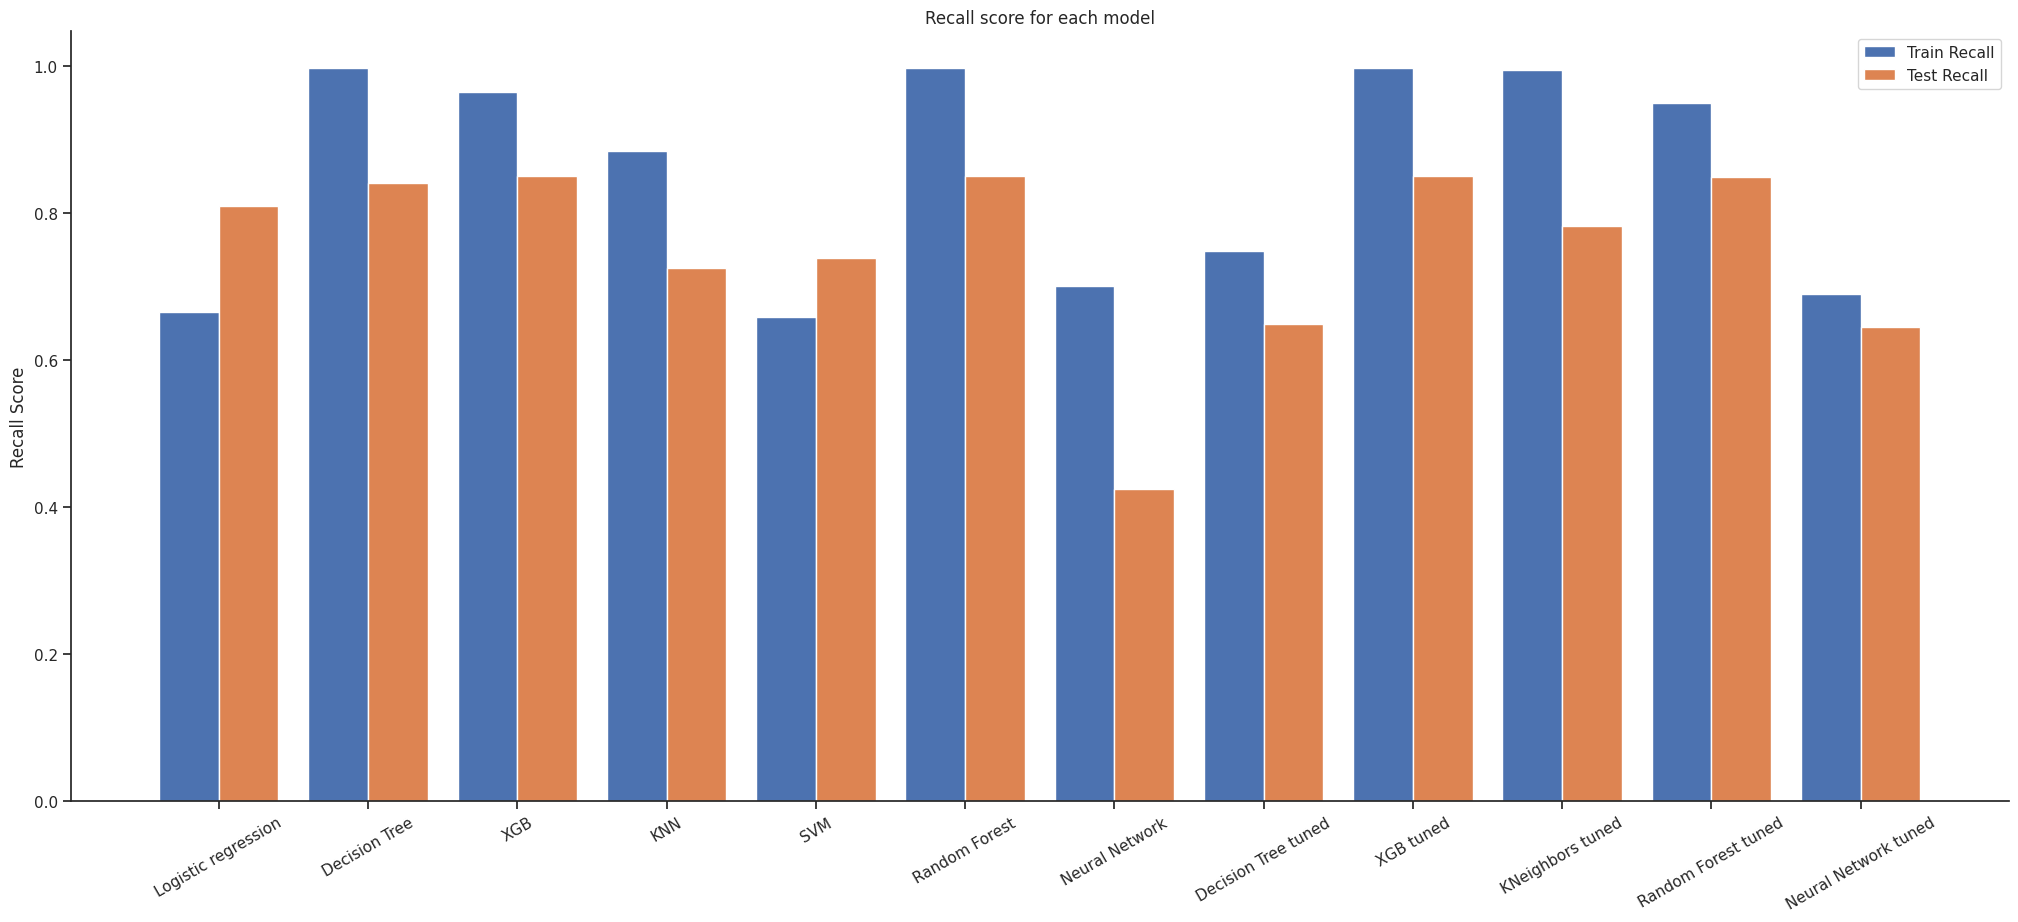

In [ ]:
# Recall Scores plot

models = list(score.columns)
train = score.iloc[2,:]
test = score.iloc[3,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Recall')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Recall')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Recall Score")
plt.title("Recall score for each model")
plt.legend()
plt.show()

## **9.Selection of best model**

In [ ]:
# Removing the overfitted models which have recall for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.95].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     #creating a new dataframe with required models
adj

Recall Train  Recall Test  Accuracy Train  Accuracy Test
Logistic regression       0.665653     0.809735        0.665653       0.809735
KNN                       0.884064     0.725664        0.884064       0.725664
SVM                       0.658489     0.738938        0.658489       0.738938
Neural Network            0.700608     0.424779        0.700608       0.424779
Decision Tree tuned       0.747720     0.648968        0.747720       0.648968
Random Forest tuned       0.949631     0.848083        0.949631       0.848083
Neural Network tuned      0.689101     0.644543        0.689101       0.644543

In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [ ]:
metrics = ['Recall', 'Accuracy']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Recall: Random Forest tuned - 0.8481
Accuracy: Random Forest tuned - 0.8481


Here, we have selected recall as our primary evaluation metric because our goal here is to maximize number of true positives ( patients correctly identified as having CHD risk) while minimizing number of false negatives (patients incorrectly identified as not having CHD risk). By doing so, we aim to ensure that we correctly identify as many patients with CHD risk as possible, even if it means that we may have some false positives.

After evaluating performance of all ML models , we have selected Random Forest as our final prediction model. This decision was based on model's performance on our primary evaluation metric i.e recall which measures the ability of the model to correctly identify patients with CHD risk. In our analysis, we found that the Random Forest (tuned) had the highest recall score among the models we evaluated.



We chose recall as our primary evaluation metric because correctly identifying patients with CHD risk is critical to achieving our business objectives. By selecting a model with a high recall score, we aim to ensure that we correctly identify as many patients with CHD risk as possible, even if it means that we may have some false positives. Overall, we believe that the Random Forest (tuned) is the best choice for our needs and will help us achieve a positive business impact.

## **10.SHAP(Shapley additive Explanations)**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing shap
import shap

In [ ]:
X_train

sex  BPMeds  prevalentStroke  prevalentHyp  diabetes  heartRate  \
3246    1     0.0                0             0         0   1.863323   
1481    0     0.0                0             0         0   1.707570   
1645    1     0.0                0             0         0   1.908485   
2467    1     0.0                0             0         0   1.982271   
1198    0     0.0                0             0         0   1.819544   
...   ...     ...              ...           ...       ...        ...   
2348    0     0.0                0             0         0   1.897627   
83      1     0.0                0             0         0   1.838849   
665     1     0.0                0             0         0   2.004321   
2742    1     0.0                0             0         0   1.838849   
1968    0     0.0                0             0         0   1.880814   

       glucose  Age_Group  BP_Category  Smoking_Status  BMI_Category  \
3246  9.055385          1            1               0             2   
1481  8.944272          2            2               0             2   
1645  8.831761          1            1               0             1   
2467  9.060161          1            1               2             3   
1198  8.246211          1            1               1             1   
...        ...        ...          ...             ...           ...   
2348  8.185353          2            2               1             2   
83    8.888194          1            1               0             2   
665   8.485281          0            0               0             1   
2742  7.745967          1            1               2             1   
1968  8.602325          1            1               2             1   

      Cholesterol_Category  
3246                     0  
1481                     2  
1645                     1  
2467                     2  
1198                     1  
...                    ...  
2348                     1  
83                       1  
665                      1  
2742                     0  
1968                     2  

[2712 rows x 12 columns]

In [ ]:
# summarize the background dataset using k-means clustering
X_summary = shap.kmeans(X_train, 100)

# create an explainer object
explainer = shap.KernelExplainer(rf2.predict_proba, X_summary)

# compute the SHAP values for all the samples in the test data
shap_values = explainer.shap_values(X_test)

  0%|          | 0/678 [00:00<?, ?it/s]

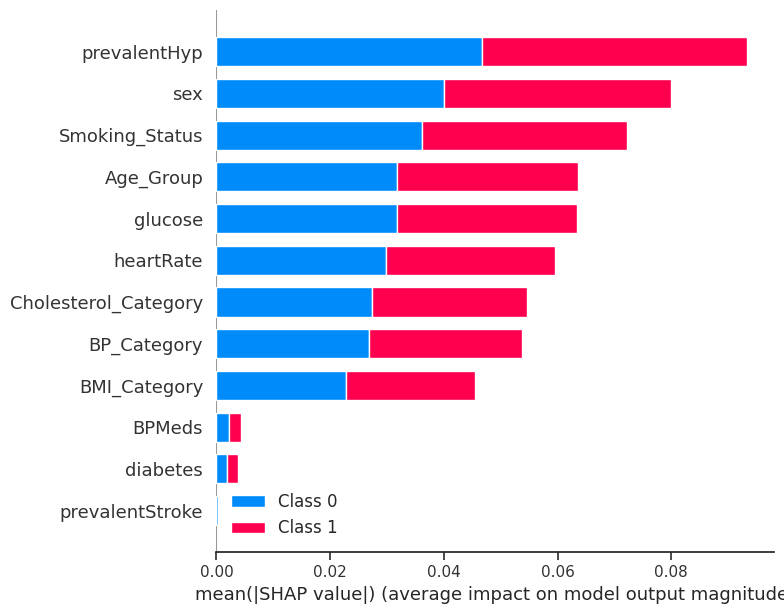

In [ ]:
# Summery plot
shap.summary_plot(shap_values, X_test, feature_names= X_train.columns)

This bar plot shows the important features and the mean shap values. It shows the average impact on the model output magnitude.

##**10.Conclusion**

We can conclude this project by emphasizing on potential of Machine learning to predict 10 year risk of future coronary heart disease(CHD) in patients using data from ongoing cardiovascular studies.

Key points of this project includes:
- Recall is used here as primary evaluation metric as our goal is to maximize true positives and to reduce false negatives .
- Top five important features for Random Forest are:

   1. Prevalent Hyp

   2. Sex

   3. Smoking_Status

   4.  Age_Group

   5.  Glucose

-  Random Forest evaluation metric:

    Recall: Random Forest tuned - 0.8481

    Accuracy: Random Forest tuned - 0.8481